In [37]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import math
from IPython.display import display,HTML
from patsy import dmatrices
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
# Reading the train data
train_df = pd.read_csv('/content/drive/MyDrive/WQD 7002 - Research Project/Dataset/job_posting_with_salary.csv')
train_df = train_df.dropna(subset=['description', 'salary_converted_max', 'salary_converted_min']).reset_index(drop=True)
# print(len(train_df))

# Checking the data types in the train data
print (train_df.info())

print ("-----------")

# Let's look at the unique values present in the data frame to have a general understanding of the data
names = train_df.columns.values
unique_values = {}
for name in names:
    unique_values[name] = train_df.loc[:,name].unique()
    print("Count of %s : %d" %(name, unique_values[name].shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       411 non-null    object 
 1   company                    399 non-null    object 
 2   country                    415 non-null    object 
 3   description                415 non-null    object 
 4   salary_converted_currency  415 non-null    object 
 5   salary_converted_max       415 non-null    float64
 6   salary_converted_min       415 non-null    float64
 7   salary_currency            415 non-null    object 
 8   salary_max                 415 non-null    float64
 9   salary_min                 415 non-null    float64
 10  salary_raw                 415 non-null    object 
 11  title                      415 non-null    object 
 12  url                        415 non-null    object 
 13  year_posted                415 non-null    int64  

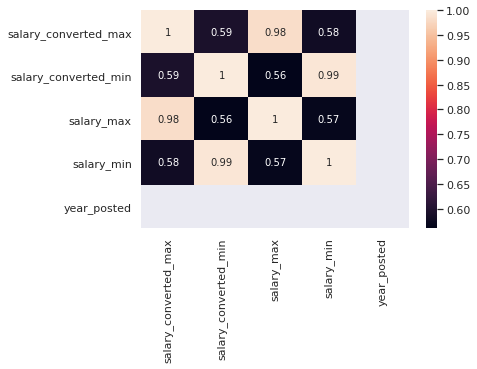

In [39]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Text(0.5, 1.0, 'Histogram of Salary Distribution')

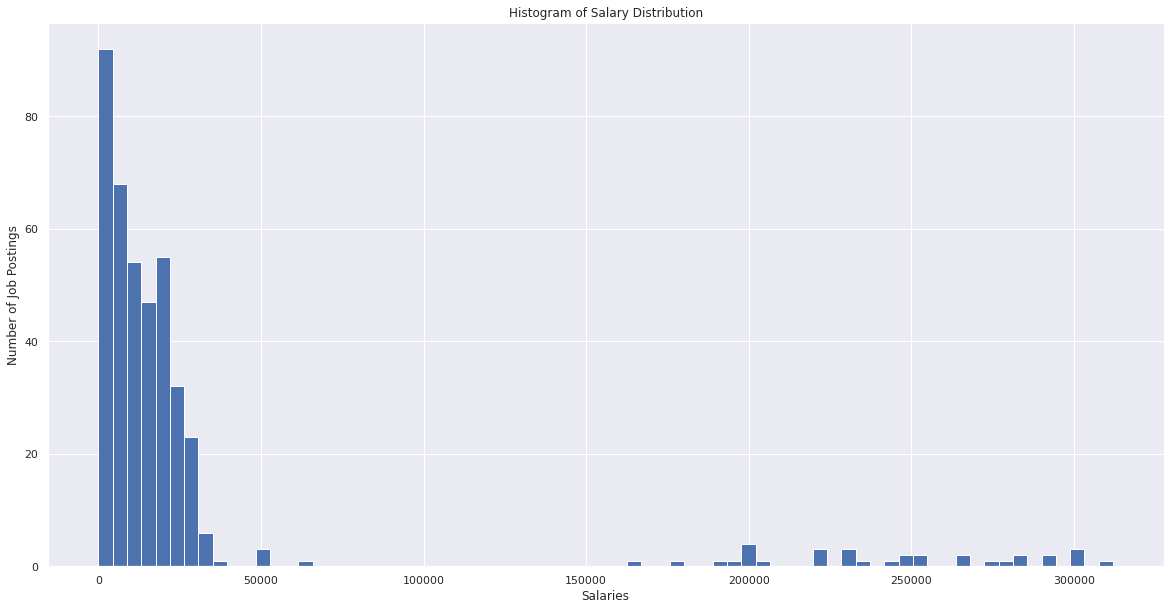

In [40]:
# Distribution of salaries based on the train data
pylab.rcParams['figure.figsize'] = (20,10)
plt.hist(train_df['salary_converted_min'], bins = 'auto')
plt.xlabel('Salaries')
plt.ylabel('Number of Job Postings')
plt.title('Histogram of Salary Distribution')

Text(0.5, 1.0, 'Histogram of Normalized Salaries')

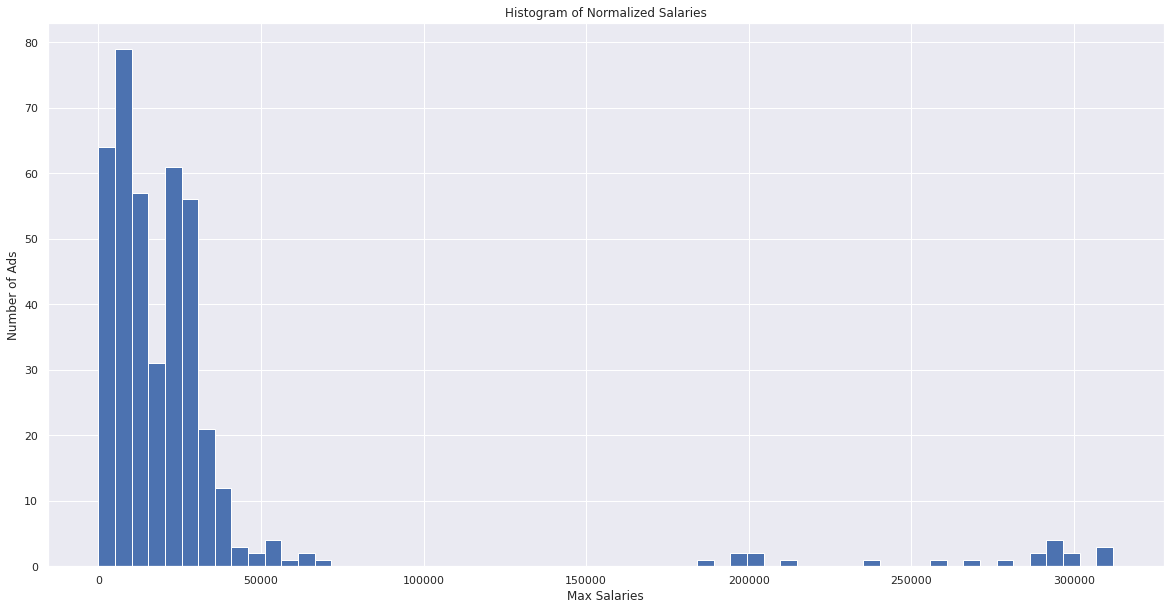

In [41]:
# Distribution of salaries based on the train data
pylab.rcParams['figure.figsize'] = (20,10)
plt.hist(train_df['salary_converted_max'], bins = 'auto')
plt.xlabel('Max Salaries')
plt.ylabel('Number of Ads')
plt.title('Histogram of Normalized Salaries')

In [42]:
train_df.head()

city  ... year_posted
0  Kuala Lumpur             ...  2021      
1  Kuala Lumpur             ...  2021      
2  Kuala Lumpur             ...  2021      
3  Kuala Lumpur (Required)  ...  2021      
4  Kuala Lumpur             ...  2021      

[5 rows x 14 columns]

In [43]:
train_df.tail()

city  ... year_posted
410  Macquarie University NSW 2109  ...  2021      
411  Hurstville NSW                 ...  2021      
412  Queanbeyan                     ...  2021      
413  New South Wales                ...  2021      
414  Melbourne VIC                  ...  2021      

[5 rows x 14 columns]

In [44]:
train_df

city  ... year_posted
0    Kuala Lumpur                   ...  2021      
1    Kuala Lumpur                   ...  2021      
2    Kuala Lumpur                   ...  2021      
3    Kuala Lumpur (Required)        ...  2021      
4    Kuala Lumpur                   ...  2021      
..            ...                   ...   ...      
410  Macquarie University NSW 2109  ...  2021      
411  Hurstville NSW                 ...  2021      
412  Queanbeyan                     ...  2021      
413  New South Wales                ...  2021      
414  Melbourne VIC                  ...  2021      

[415 rows x 14 columns]

In [45]:
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from string import punctuation
import collections

In [46]:
# To obtain the full width of a cell in a dataframe
pd.set_option('display.max_colwidth', -1)
desc = train_df.loc[1,'description']

# using raw words without cleaning for measurement purpose
raw_description = []

# train_df.loc[60]

for i in range(0,train_df.shape[0]):
    desc = train_df.loc[i,'description']

    raw_description.append(desc)

# Creating a list of words from all the job descriptions in train_df_random_subset data
all_desc = []

for i in range(0,train_df.shape[0]):
    desc = train_df.loc[i,'description']
    desc1 = desc.lower()
    # Removing numbers, *** and www links from the data
    desc2 = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',desc1)
    # Removing punctuation
    for p in punctuation:
        desc2 = desc2.replace(p,'')
    all_desc.append(desc2)

In [47]:
nltk.download('punkt')

# Creating word tokens for all the descriptions
final_list = []
for desc in all_desc:
    word_list = word_tokenize(desc)
    final_list.extend(word_list)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
nltk.download('averaged_perceptron_tagger')

# 3. Tagging parts of speech
pos_tagged = nltk.pos_tag(final_list)

# 4. Identifying the most common parts of speech
tag_fd = nltk.FreqDist(tag for (word, tag) in pos_tagged)
tag_fd.most_common()[:5]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('NN', 48854), ('JJ', 21285), ('NNS', 19219), ('IN', 17694), ('CC', 11511)]

In [49]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

list_wo_stopwords = []
for w in final_list:
    if w not in stop_words:
        list_wo_stopwords.append(w)
        
# 3. Tagging parts of speech
pos_tagged_wo_sw = nltk.pos_tag(list_wo_stopwords)

# 4. Identifying the most common parts of speech
tag_fd_wo_sw = nltk.FreqDist(tag for (word, tag) in pos_tagged_wo_sw)
tag_fd_wo_sw.most_common()[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('NN', 46898), ('JJ', 21933), ('NNS', 18783), ('VBG', 6823), ('VBP', 6524)]

In [50]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization without specifying parts of speech
list_lemmatized = []
for word in list_wo_stopwords:
    list_lemmatized.append(lemmatizer.lemmatize(word))

word_freq_lem = dict(collections.Counter(list_lemmatized))
keys = list(word_freq_lem.keys())
values = list(word_freq_lem.values())
df_lem = pd.DataFrame({'words':keys,'freq':values})
display(df_lem.sort_values(by = 'freq',ascending = False)[:10])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,words,freq
74,data,1647
237,experience,1513
56,work,979
7,research,758
72,team,750
324,skill,723
313,application,719
60,development,710
75,science,614
231,role,586


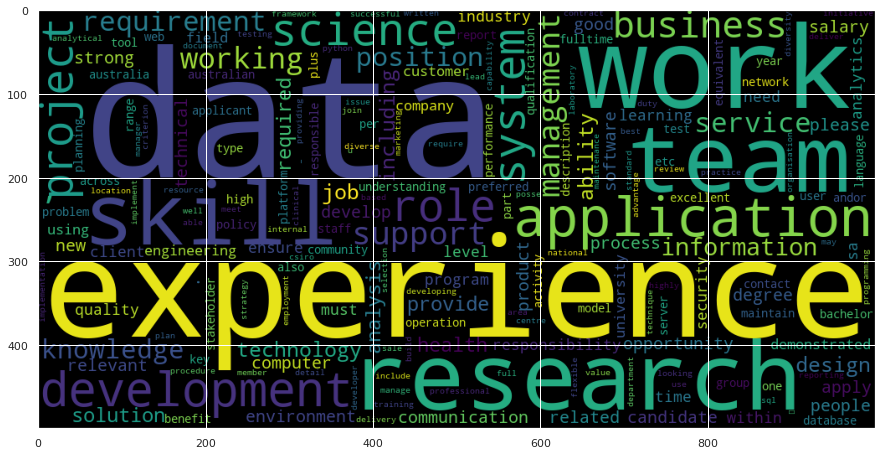

In [51]:
from wordcloud import WordCloud
from collections import Counter

word_could_dict = Counter(word_freq_lem)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# Add Cost of living data

In [52]:
# Numbeo API
cost_of_living_index = {
  "MY": 0.4042,
  "SG": 0.8289,
  "AU": 0.8261
}
train_df['cost_of_living_index'] = train_df['country'].apply(lambda x: cost_of_living_index[x])

train_df.head()

city  ... cost_of_living_index
0  Kuala Lumpur             ...  0.4042             
1  Kuala Lumpur             ...  0.4042             
2  Kuala Lumpur             ...  0.4042             
3  Kuala Lumpur (Required)  ...  0.4042             
4  Kuala Lumpur             ...  0.4042             

[5 rows x 15 columns]

# Add salary percentile
- discretization into bin of salary range

In [53]:
t20 = np.percentile(train_df['salary_converted_max'], 80)
m40 = np.percentile(train_df['salary_converted_max'], 40)

train_df['target'] = train_df['salary_converted_max'].apply(lambda x: 'T20' if x >= t20 else ('B40' if x < m40 else 'M40'))
# train_df['target'] = train_df['salary_converted_max'].apply(lambda x: 3 if x >= t20 else (1 if x < m40 else 2))

train_df.head()

city  ... target
0  Kuala Lumpur             ...  B40  
1  Kuala Lumpur             ...  B40  
2  Kuala Lumpur             ...  M40  
3  Kuala Lumpur (Required)  ...  B40  
4  Kuala Lumpur             ...  B40  

[5 rows x 16 columns]

In [54]:
grouped_df = train_df.groupby('target')

grouped_df.first()

city                 company  ... year_posted cost_of_living_index
target                                        ...                                 
B40     Kuala Lumpur  Company Background      ...  2021        0.4042             
M40     Kuala Lumpur  Icon Plc                ...  2021        0.4042             
T20     Singapore     Golden Bridge Drive SG  ...  2021        0.8289             

[3 rows x 15 columns]

In [55]:
train_df.columns

Index(['city', 'company', 'country', 'description',
       'salary_converted_currency', 'salary_converted_max',
       'salary_converted_min', 'salary_currency', 'salary_max', 'salary_min',
       'salary_raw', 'title', 'url', 'year_posted', 'cost_of_living_index',
       'target'],
      dtype='object')

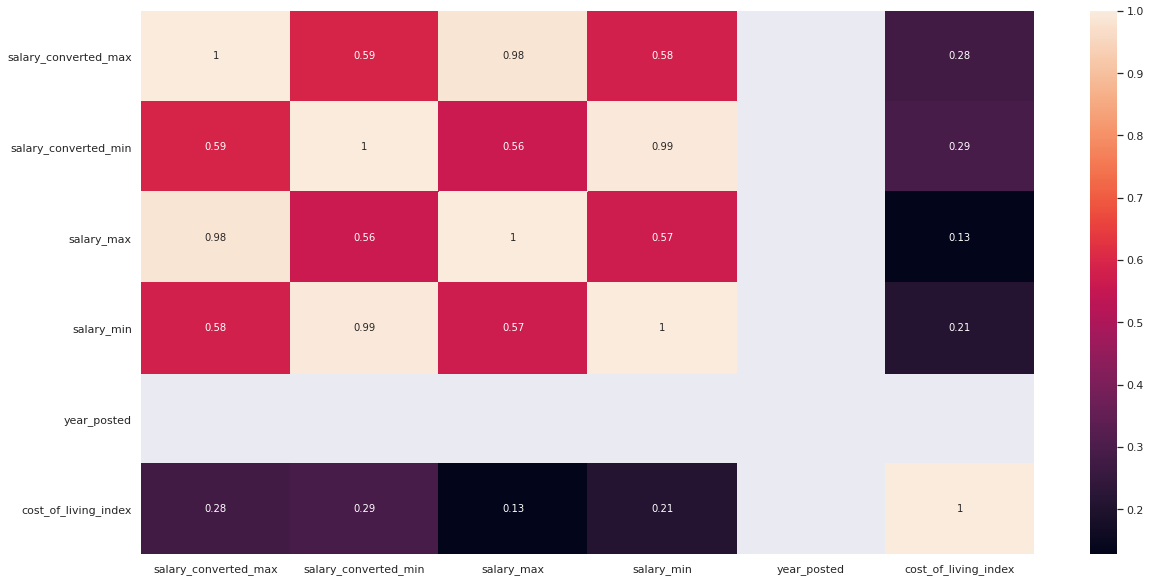

Index(['salary_converted_max', 'salary_converted_min', 'cost_of_living_index'], dtype='object')
['B40' 'M40' 'T20']


In [56]:
# Dropping job description column from the dataset
train_x = train_df.drop(['city','company','country','description','salary_converted_currency','salary_currency','salary_max','salary_min','salary_raw','title','url','year_posted','target'], axis=1)
# train_x = train_df.drop(['city','company','country','description','salary_converted_currency','salary_currency','salary_max','salary_min','salary_raw','title','url','year_posted'], axis=1)

# print(train_x.isnull().values.any())
# print(len(train_x.index))
# train_x = train_x.dropna()
# print(len(train_x.index))

correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

print(train_x.columns)

train_x1 = pd.get_dummies(train_x,drop_first=True)
data = np.array(train_x1)
target = np.array(train_df['target'])

class_names = np.unique(target)
print(class_names)

In [57]:
len(data[0])

3

# Multi-class Classification for Non Text fields

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score, auc
from itertools import cycle

In [59]:
def model_stat(model_name, data, target, classifier, y_test, y_prediction):
  # Confusion Matrix
  classifier_confusion_matrix = confusion_matrix(y_test, y_prediction)
  FP = classifier_confusion_matrix.sum(axis=0) - np.diag(classifier_confusion_matrix)
  FN = classifier_confusion_matrix.sum(axis=1) - np.diag(classifier_confusion_matrix)
  TP = np.diag(classifier_confusion_matrix)
  TN = classifier_confusion_matrix.sum() - (FP + FN + TP)
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy for each class
  ACC = (TP+TN)/(TP+FP+FN+TN)

  # Using 10-fold cross-validation
  cv = KFold(n_splits = 10, random_state = 42)
  cv = StratifiedKFold(n_splits = 10, random_state = 42)

  classifier_cross_validation_score = cross_val_score(classifier, data, target, cv = cv, scoring = 'accuracy', n_jobs = -1)
  cross_validation_score = "%0.2f accuracy with a Standard Deviation of %0.2f" %(mean(classifier_cross_validation_score), std(classifier_cross_validation_score))

  # Print Results
  print(f'{model_name} (Train/Test Split) - Classification Report:\n\n', classification_report(y_test, y_prediction))
  print('\n')
  print(f'{model_name} (Train/Test Split) - Confusion Matrix:\n', classifier_confusion_matrix)
  print('\n')
  print(f'{model_name} (Train/Test Split) - Mean FPR:\n', mean(FPR))
  print('\n')
  print(f'{model_name} (Train/Test Split) - Accuracy:\n', accuracy_score(y_test, y_prediction))
  print('\n')
  print(f'{model_name} (10-Fold Stratified Cross Validation) - Cross Validation Score:\n\n', cross_validation_score)

  # AUC-ROC

  y_bin = label_binarize(target, classes = class_names)
  n_classes = y_bin.shape[1]
  x_train, x_test, y_train, y_test = train_test_split(data, y_bin, test_size = 0.5, random_state = 0)

  rest_classifier = OneVsRestClassifier(classifier)
  y_score = rest_classifier.fit(x_train, y_train).predict_proba(x_test)

  # Plotting and estimation of FPR, TPR

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  roc_auc_scores = list(roc_auc.values())

  print(roc_auc_scores)

  colors = cycle(['blue', 'red', 'green'])

  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(class_names[i], roc_auc[i]))

  print(f'{model_name} - Mean AUC-ROC Score:\n\n', mean(roc_auc_scores))

  plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{model_name} - AUC-ROC for multi-class data')
  plt.legend(loc="lower right")
  plt.show()


## MNB

Multinomial Naive Bayes (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.82      0.17      0.28        53
         M40       0.47      0.18      0.26        50
         T20       0.21      0.91      0.34        22

    accuracy                           0.30       125
   macro avg       0.50      0.42      0.29       125
weighted avg       0.57      0.30      0.28       125



Multinomial Naive Bayes (Train/Test Split) - Confusion Matrix:
 [[ 9  8 36]
 [ 2  9 39]
 [ 0  2 20]]


Multinomial Naive Bayes (Train/Test Split) - Mean FPR:
 0.29642215030564545


Multinomial Naive Bayes (Train/Test Split) - Accuracy:
 0.304


Multinomial Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.29 accuracy with a Standard Deviation of 0.14
[0.5775227164036346, 0.5235695084485407, 0.5621301775147929]
Multinomial Naive Bayes - Mean AUC-ROC Score:

 0.5544074674556561


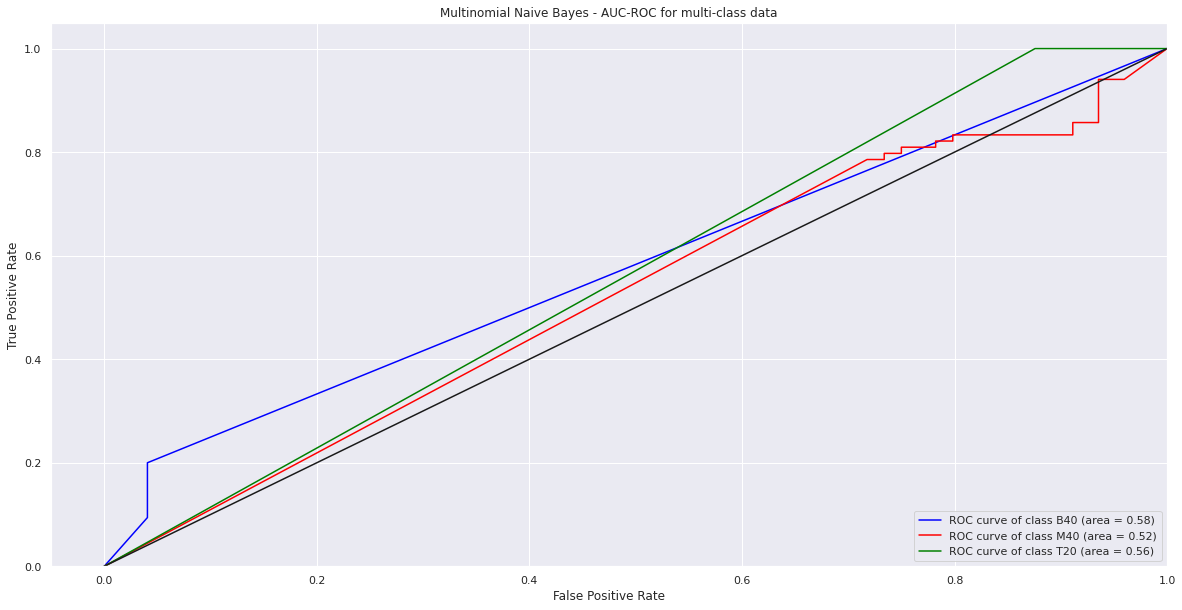

In [60]:
def mnb_model(data, target):
  # Multinomial Naive Bayes
  from sklearn.naive_bayes import MultinomialNB

  # train/test split
  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 1)
  classifier = MultinomialNB()
  classifier.fit(x_train, y_train)

  y_prediction = classifier.predict(x_test)

  model_stat("Multinomial Naive Bayes", data, target, classifier, y_test, y_prediction)

mnb_model(data, target)

## GNB

Gaussian Naive Bayes (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.96      0.89      0.92        53
         M40       0.84      0.92      0.88        50
         T20       0.62      0.59      0.60        22

    accuracy                           0.85       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.85      0.85      0.85       125



Gaussian Naive Bayes (Train/Test Split) - Confusion Matrix:
 [[47  0  6]
 [ 2 46  2]
 [ 0  9 13]]


Gaussian Naive Bayes (Train/Test Split) - Mean FPR:
 0.07514922689679972


Gaussian Naive Bayes (Train/Test Split) - Accuracy:
 0.848


Gaussian Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.84 accuracy with a Standard Deviation of 0.06
[0.9890961262553801, 0.945084485407066, 0.9578212714307389]
Gaussian Naive Bayes - Mean AUC-ROC Score:

 0.9640006276977283


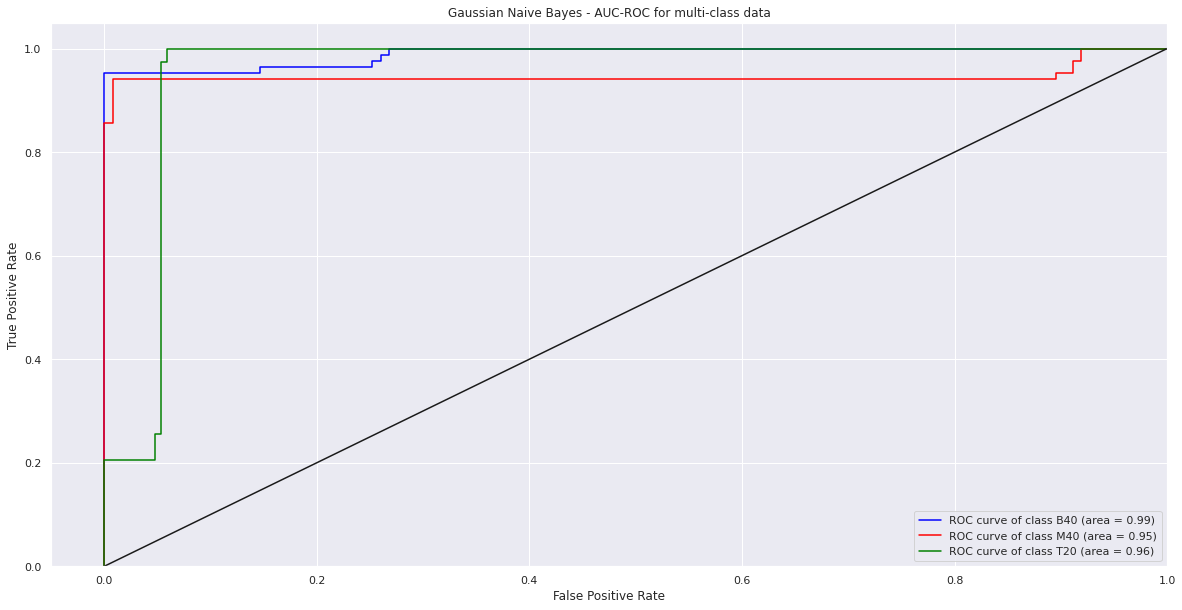

In [61]:
def gnb_model(data, target):
  from sklearn.naive_bayes import GaussianNB

  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 1)
  classifier = GaussianNB()
  classifier.fit(x_train, y_train)

  y_prediction = classifier.predict(x_test)

  model_stat("Gaussian Naive Bayes", data, target, classifier, y_test, y_prediction)

gnb_model(data, target)

## SVM

Support Vector Machine (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.98      0.98      0.98        53
         M40       0.84      0.98      0.91        50
         T20       0.93      0.59      0.72        22

    accuracy                           0.91       125
   macro avg       0.92      0.85      0.87       125
weighted avg       0.92      0.91      0.91       125



Support Vector Machine (Train/Test Split) - Confusion Matrix:
 [[52  0  1]
 [ 1 49  0]
 [ 0  9 13]]


Support Vector Machine (Train/Test Split) - Mean FPR:
 0.04786587558432218


Support Vector Machine (Train/Test Split) - Accuracy:
 0.912


Support Vector Machine (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.85 accuracy with a Standard Deviation of 0.09
[0.9938785270205643, 0.7371351766513057, 0.9913518434228493]
Support Vector Machine - Mean AUC-ROC Score:

 0.9074551823649064


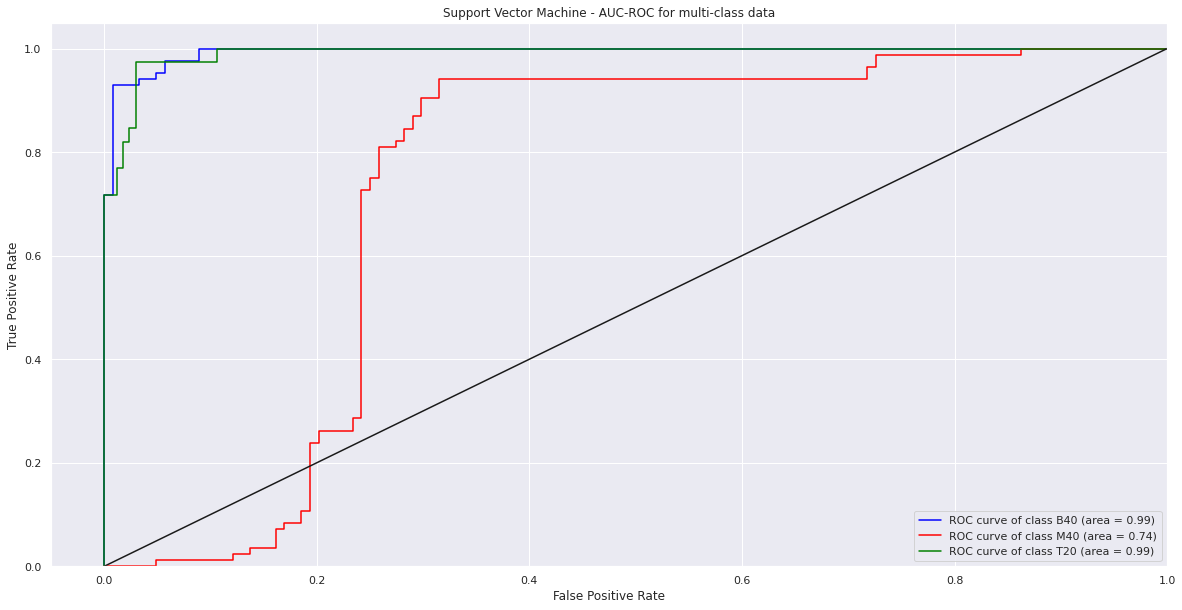

In [62]:
def svm_model(data, target):
  from sklearn import svm

  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 1)
  classifier = svm.SVC(probability=True)
  classifier.fit(x_train, y_train)

  y_prediction = classifier.predict(x_test)

  model_stat("Support Vector Machine", data, target, classifier, y_test, y_prediction)

svm_model(data, target)

## RF

Random Forest (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.99      0.99      0.99        85
         M40       0.98      0.99      0.98        82
         T20       1.00      0.98      0.99        41

    accuracy                           0.99       208
   macro avg       0.99      0.98      0.99       208
weighted avg       0.99      0.99      0.99       208



Random Forest (Train/Test Split) - Confusion Matrix:
 [[84  1  0]
 [ 1 81  0]
 [ 0  1 40]]


Random Forest (Train/Test Split) - Mean FPR:
 0.008001032391276294


Random Forest (Train/Test Split) - Accuracy:
 0.9855769230769231


Random Forest (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.99 accuracy with a Standard Deviation of 0.02
[0.9967479674796748, 0.9919354838709676, 0.9969655590957366]
Random Forest - Mean AUC-ROC Score:

 0.9952163368154596


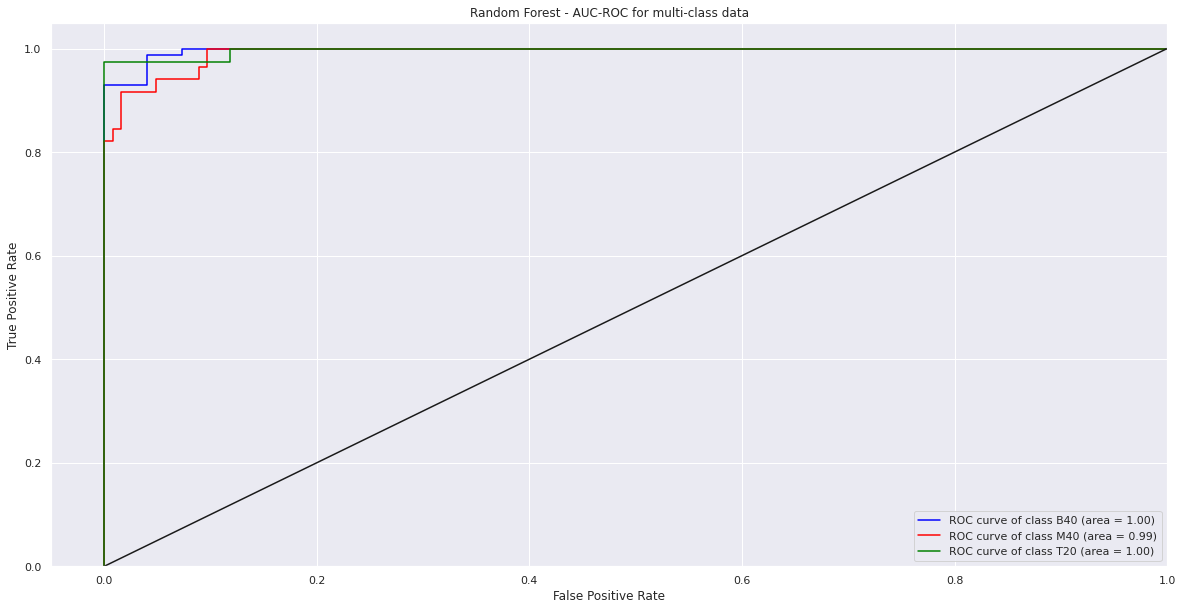

In [63]:
def rf_model(data, target):
  from sklearn.ensemble import RandomForestClassifier

  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.5, random_state = 1)

  classifier = RandomForestClassifier(n_estimators = 500, max_depth = 100, max_features = 1, min_samples_leaf = 20)
  classifier.fit(x_train, y_train)

  y_prediction = classifier.predict(x_test)

  model_stat("Random Forest", data, target, classifier, y_test, y_prediction)

rf_model(data, target)

## MLP

Multilayer Percepteron Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       1.00      1.00      1.00        53
         M40       1.00      1.00      1.00        50
         T20       1.00      1.00      1.00        22

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



Multilayer Percepteron Classifier (Train/Test Split) - Confusion Matrix:
 [[53  0  0]
 [ 0 50  0]
 [ 0  0 22]]


Multilayer Percepteron Classifier (Train/Test Split) - Mean FPR:
 0.0


Multilayer Percepteron Classifier (Train/Test Split) - Accuracy:
 1.0


Multilayer Percepteron Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.39 accuracy with a Standard Deviation of 0.09
[0.8913438546150168, 0.42194700460829493, 0.20421787285692614]
Multilayer Percepteron Classifier - Mean AUC-ROC Score:

 0.505836244

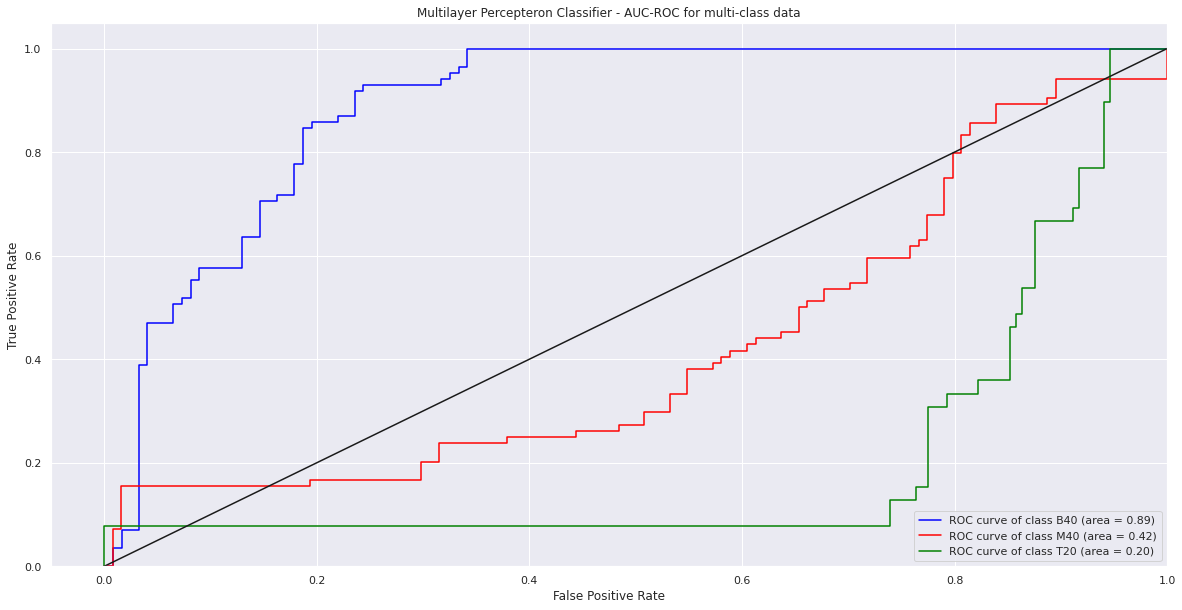

In [64]:
def mlp_model(data, target):
  from sklearn.neural_network import MLPClassifier
  from sklearn.preprocessing import StandardScaler

  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 1)

  scaler = StandardScaler(with_mean = False)
  scaler.fit(x_train)

  x_train = scaler.transform(x_train)
  x_test = scaler.transform(x_test)

  classifier = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter = 1000)
  classifier.fit(x_train, y_train)

  y_prediction = classifier.predict(x_test)

  model_stat("Multilayer Percepteron Classifier", data, target, classifier, y_test, y_prediction)

mlp_model(data, target)

## KNN

[4.8048000e+01 2.6623896e+05 8.2610000e-01]
Classifier Persistence Completed!
K-nearest Neighbors Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       1.00      1.00      1.00        53
         M40       0.98      1.00      0.99        50
         T20       1.00      0.95      0.98        22

    accuracy                           0.99       125
   macro avg       0.99      0.98      0.99       125
weighted avg       0.99      0.99      0.99       125



K-nearest Neighbors Classifier (Train/Test Split) - Confusion Matrix:
 [[53  0  0]
 [ 0 50  0]
 [ 0  1 21]]


K-nearest Neighbors Classifier (Train/Test Split) - Mean FPR:
 0.0044444444444444444


K-nearest Neighbors Classifier (Train/Test Split) - Accuracy:
 0.992


K-nearest Neighbors Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.96 accuracy with a Standard Deviation of 0.03
[0.9912003825920612, 0.9780145929339477, 0.997117

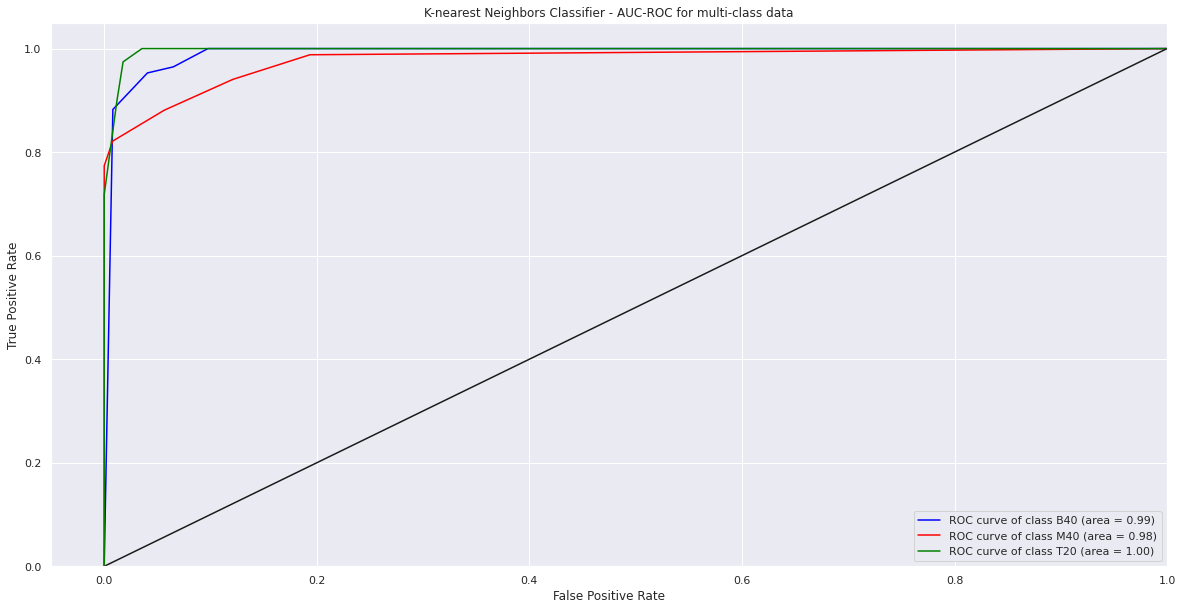

In [65]:
 def knn_model(data, target):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.externals import joblib

  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 1)

  classifier = KNeighborsClassifier()
  classifier.fit(x_train, y_train)

  print(x_train[0])

  y_prediction = classifier.predict(x_test)

  joblib.dump(classifier, 'knn_simple_classifier.pkl') 

  print("Classifier Persistence Completed!")

  model_stat("K-nearest Neighbors Classifier", data, target, classifier, y_test, y_prediction)

knn_model(data, target)

# Models with Text Variables


### Raw text

In [30]:
def vectorize_words(words):
  from sklearn.feature_extraction.text import CountVectorizer

  count_vect = CountVectorizer()
  x_train_counts = count_vect.fit_transform(words)

  count_vect.get_feature_names()
      
  return x_train_counts.todense()

Multinomial Naive Bayes (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.76      0.70      0.73        53
         M40       0.57      0.72      0.64        50
         T20       0.46      0.27      0.34        22

    accuracy                           0.63       125
   macro avg       0.60      0.56      0.57       125
weighted avg       0.63      0.63      0.62       125



Multinomial Naive Bayes (Train/Test Split) - Confusion Matrix:
 [[37 14  2]
 [ 9 36  5]
 [ 3 13  6]]


Multinomial Naive Bayes (Train/Test Split) - Mean FPR:
 0.19820927723840343


Multinomial Naive Bayes (Train/Test Split) - Accuracy:
 0.632


Multinomial Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.62 accuracy with a Standard Deviation of 0.14
[0.82285987565758, 0.7249903993855606, 0.8111819147322106]
Multinomial Naive Bayes - Mean AUC-ROC Score:

 0.7863440632584503


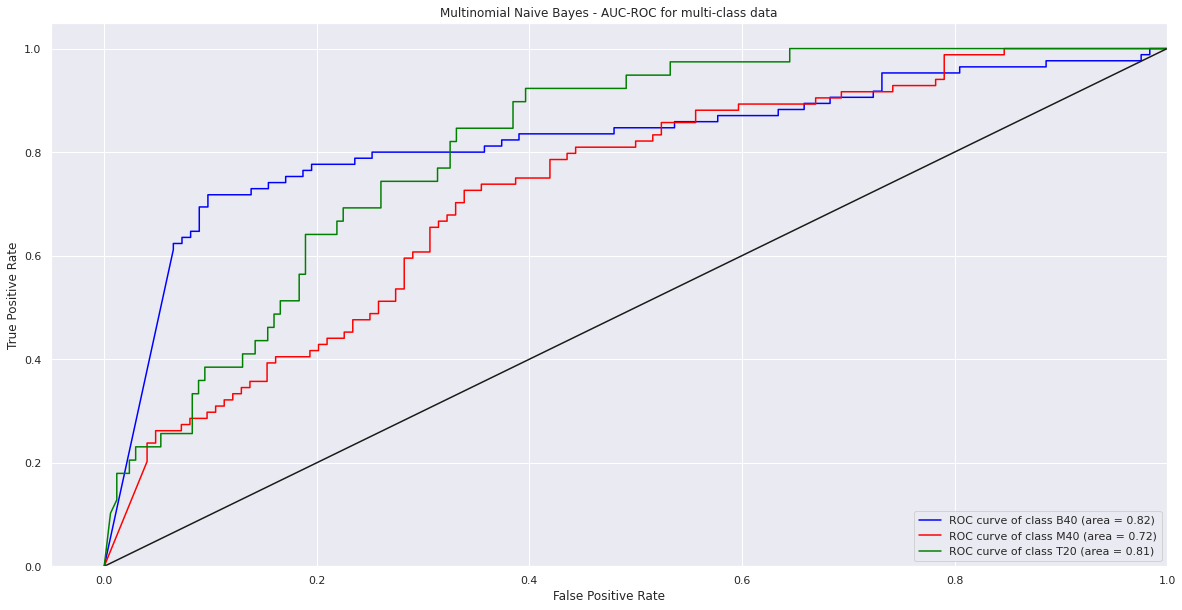

Support Vector Machine (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.74      0.66      0.70        53
         M40       0.49      0.76      0.59        50
         T20       0.00      0.00      0.00        22

    accuracy                           0.58       125
   macro avg       0.41      0.47      0.43       125
weighted avg       0.51      0.58      0.53       125



Support Vector Machine (Train/Test Split) - Confusion Matrix:
 [[35 18  0]
 [12 38  0]
 [ 0 22  0]]


Support Vector Machine (Train/Test Split) - Mean FPR:
 0.2333333333333333


Support Vector Machine (Train/Test Split) - Accuracy:
 0.584


Support Vector Machine (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.57 accuracy with a Standard Deviation of 0.09
[0.8302247728359637, 0.668778801843318, 0.7425276892732514]
Support Vector Machine - Mean AUC-ROC Score:

 0.7471770879841776


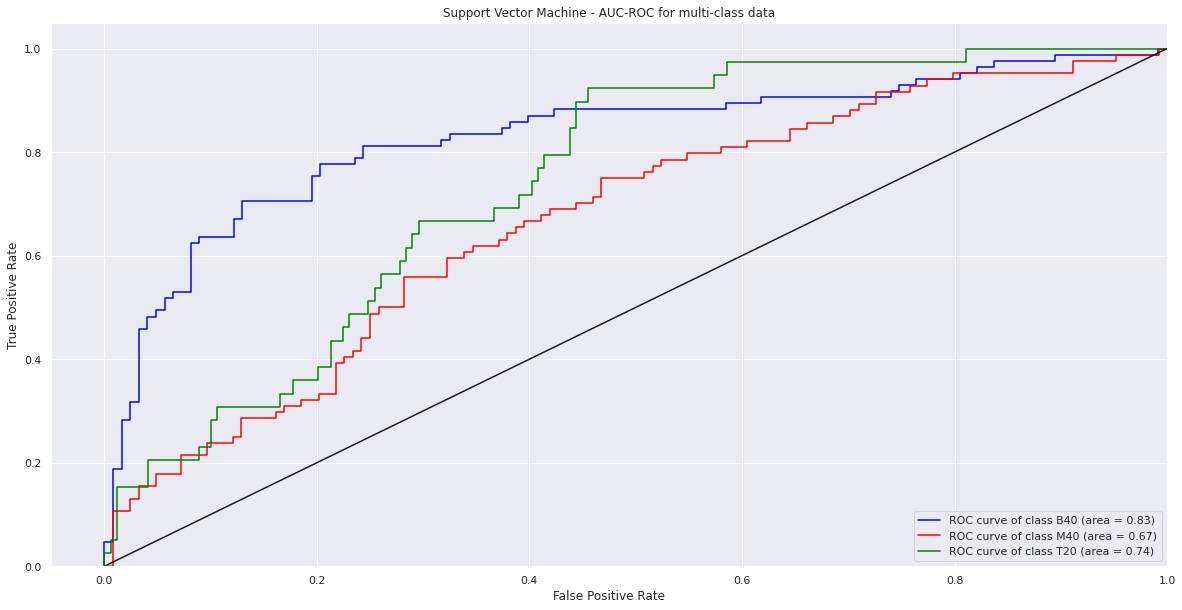

Random Forest (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.00      0.00      0.00        85
         M40       0.39      1.00      0.57        82
         T20       0.00      0.00      0.00        41

    accuracy                           0.39       208
   macro avg       0.13      0.33      0.19       208
weighted avg       0.16      0.39      0.22       208



Random Forest (Train/Test Split) - Confusion Matrix:
 [[ 0 85  0]
 [ 0 82  0]
 [ 0 41  0]]


Random Forest (Train/Test Split) - Mean FPR:
 0.3333333333333333


Random Forest (Train/Test Split) - Accuracy:
 0.3942307692307692


Random Forest (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.45 accuracy with a Standard Deviation of 0.06
[0.7477761836441894, 0.6209197388632872, 0.6442118039751177]
Random Forest - Mean AUC-ROC Score:

 0.6709692421608647


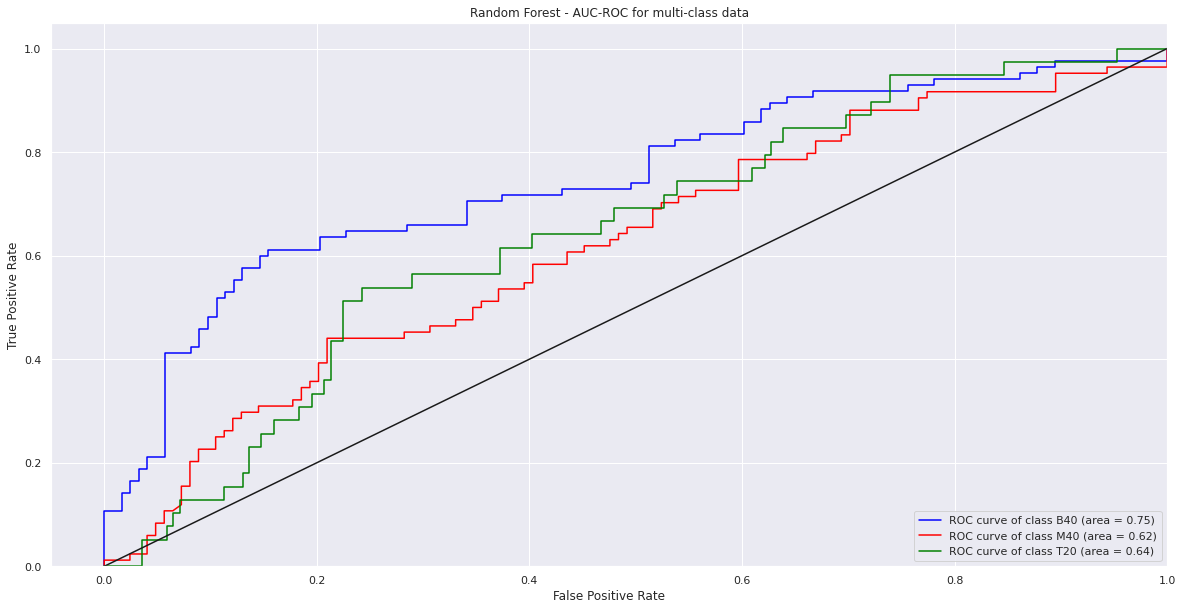

Multilayer Percepteron Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.75      0.68      0.71        53
         M40       0.52      0.46      0.49        50
         T20       0.33      0.50      0.40        22

    accuracy                           0.56       125
   macro avg       0.54      0.55      0.53       125
weighted avg       0.59      0.56      0.57       125



Multilayer Percepteron Classifier (Train/Test Split) - Confusion Matrix:
 [[36 13  4]
 [ 9 23 18]
 [ 3  8 11]]


Multilayer Percepteron Classifier (Train/Test Split) - Mean FPR:
 0.22008629989212514


Multilayer Percepteron Classifier (Train/Test Split) - Accuracy:
 0.56


Multilayer Percepteron Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.63 accuracy with a Standard Deviation of 0.13
[0.82285987565758, 0.7205261136712748, 0.7836443635260203]
Multilayer Percepteron Classifier - Mean AUC-ROC Score:


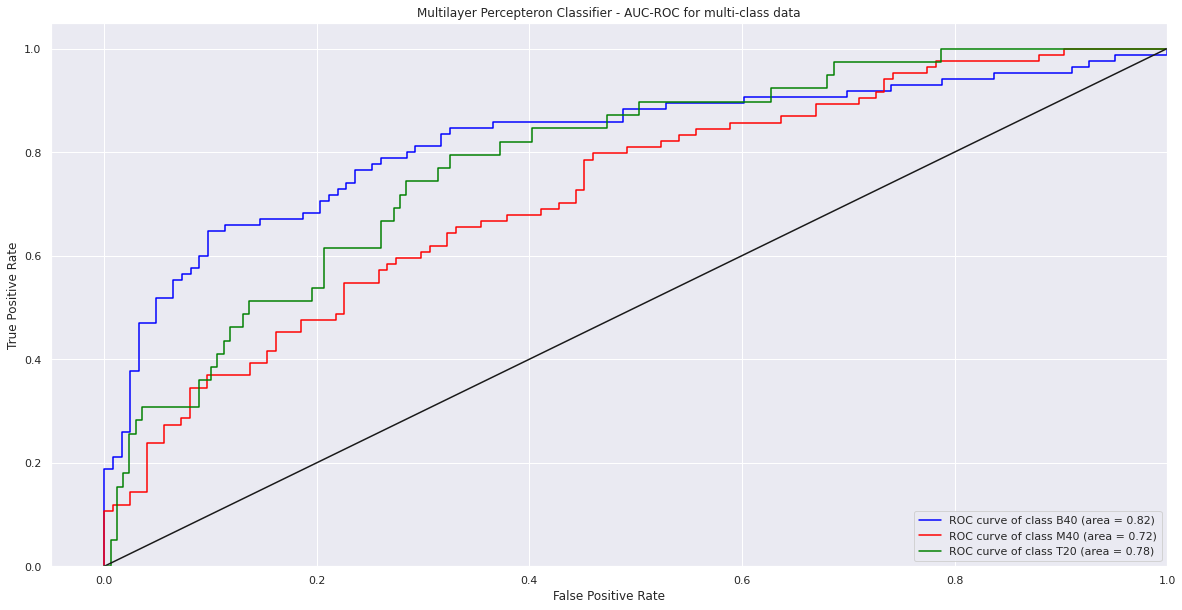

Classifier Persistence Completed!
K-nearest Neighbors Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.75      0.57      0.65        53
         M40       0.50      0.78      0.61        50
         T20       0.57      0.18      0.28        22

    accuracy                           0.58       125
   macro avg       0.61      0.51      0.51       125
weighted avg       0.62      0.58      0.57       125



K-nearest Neighbors Classifier (Train/Test Split) - Confusion Matrix:
 [[30 22  1]
 [ 9 39  2]
 [ 1 17  4]]


K-nearest Neighbors Classifier (Train/Test Split) - Mean FPR:
 0.22933836749370728


K-nearest Neighbors Classifier (Train/Test Split) - Accuracy:
 0.584


K-nearest Neighbors Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.56 accuracy with a Standard Deviation of 0.08
[0.753323768531803, 0.6211117511520737, 0.6433773327264452]
K-nearest Neighbors Classifier - Me

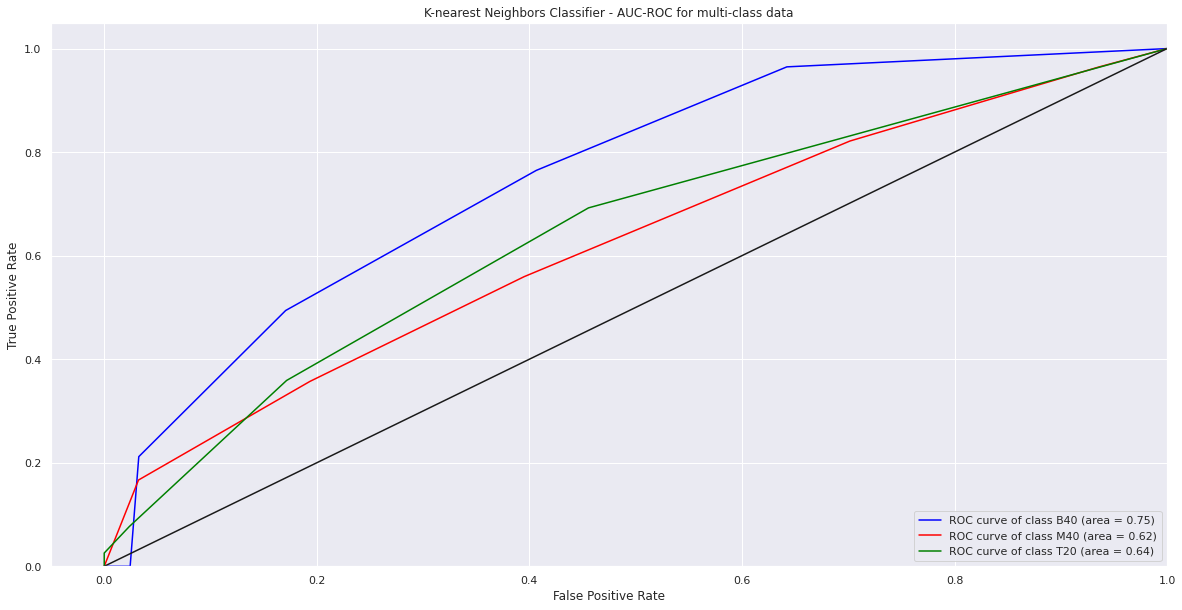

In [31]:
data_raw_text = vectorize_words(raw_description)

mnb_model(data_raw_text, target)
svm_model(data_raw_text, target)
rf_model(data_raw_text, target)
mlp_model(data_raw_text, target)
knn_model(data_raw_text, target)

### With Stopwords

Multinomial Naive Bayes (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.77      0.64      0.70        53
         M40       0.53      0.74      0.62        50
         T20       0.45      0.23      0.30        22

    accuracy                           0.61       125
   macro avg       0.59      0.54      0.54       125
weighted avg       0.62      0.61      0.60       125



Multinomial Naive Bayes (Train/Test Split) - Confusion Matrix:
 [[34 17  2]
 [ 9 37  4]
 [ 1 16  5]]


Multinomial Naive Bayes (Train/Test Split) - Mean FPR:
 0.2123804386911183


Multinomial Naive Bayes (Train/Test Split) - Accuracy:
 0.608


Multinomial Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.63 accuracy with a Standard Deviation of 0.12
[0.8197991391678622, 0.7257584485407066, 0.8155818540433925]
Multinomial Naive Bayes - Mean AUC-ROC Score:

 0.7870464805839871


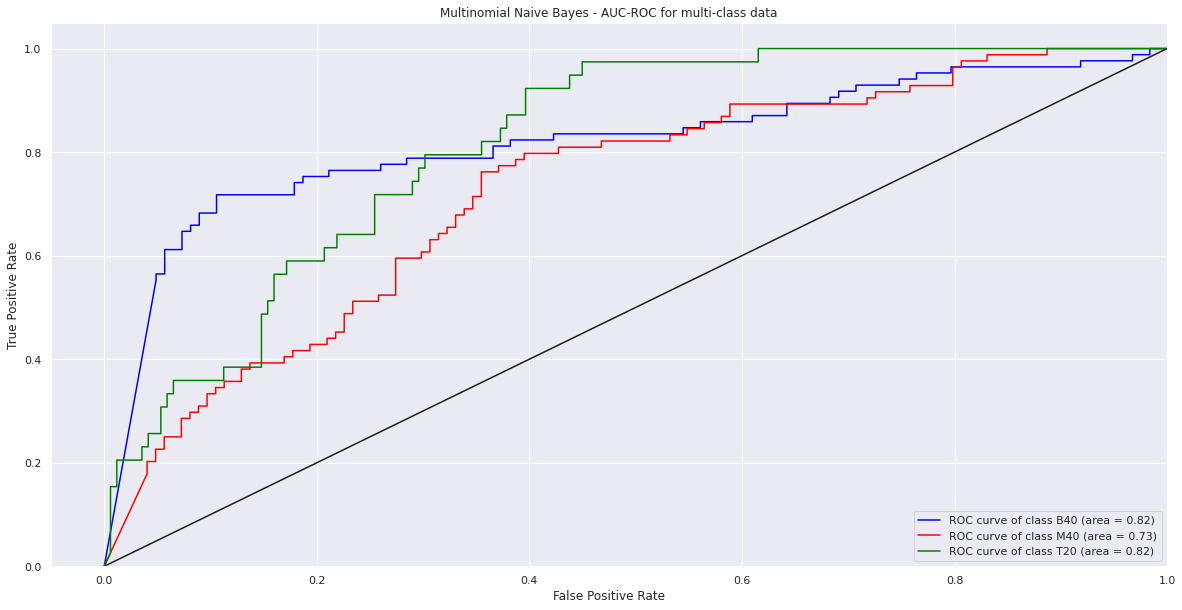

Support Vector Machine (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.71      0.64      0.67        53
         M40       0.48      0.74      0.58        50
         T20       0.00      0.00      0.00        22

    accuracy                           0.57       125
   macro avg       0.40      0.46      0.42       125
weighted avg       0.49      0.57      0.52       125



Support Vector Machine (Train/Test Split) - Confusion Matrix:
 [[34 19  0]
 [13 37  0]
 [ 1 21  0]]


Support Vector Machine (Train/Test Split) - Mean FPR:
 0.24259259259259258


Support Vector Machine (Train/Test Split) - Accuracy:
 0.568


Support Vector Machine (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.56 accuracy with a Standard Deviation of 0.09
[0.8276422764227643, 0.6723310291858678, 0.7363070854195115]
Support Vector Machine - Mean AUC-ROC Score:

 0.7454267970093813


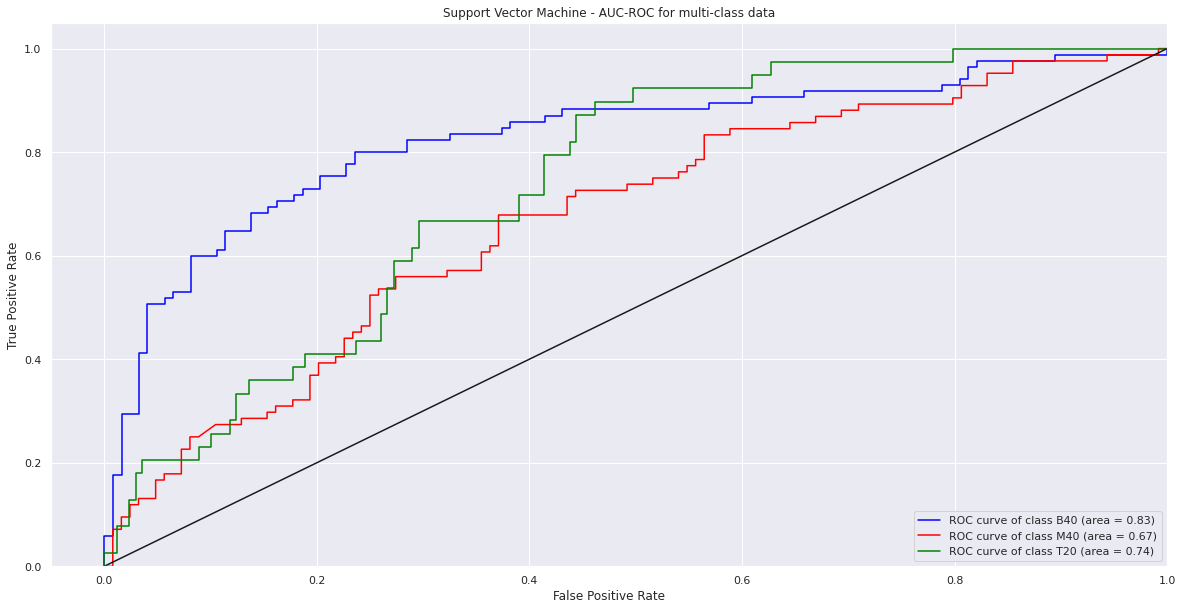

Random Forest (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.00      0.00      0.00        85
         M40       0.39      1.00      0.57        82
         T20       0.00      0.00      0.00        41

    accuracy                           0.39       208
   macro avg       0.13      0.33      0.19       208
weighted avg       0.16      0.39      0.22       208



Random Forest (Train/Test Split) - Confusion Matrix:
 [[ 0 85  0]
 [ 0 82  0]
 [ 0 41  0]]


Random Forest (Train/Test Split) - Mean FPR:
 0.3333333333333333


Random Forest (Train/Test Split) - Accuracy:
 0.3942307692307692


Random Forest (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.43 accuracy with a Standard Deviation of 0.06
[0.6794356767097083, 0.580837173579109, 0.7020179032013351]
Random Forest - Mean AUC-ROC Score:

 0.6540969178300508


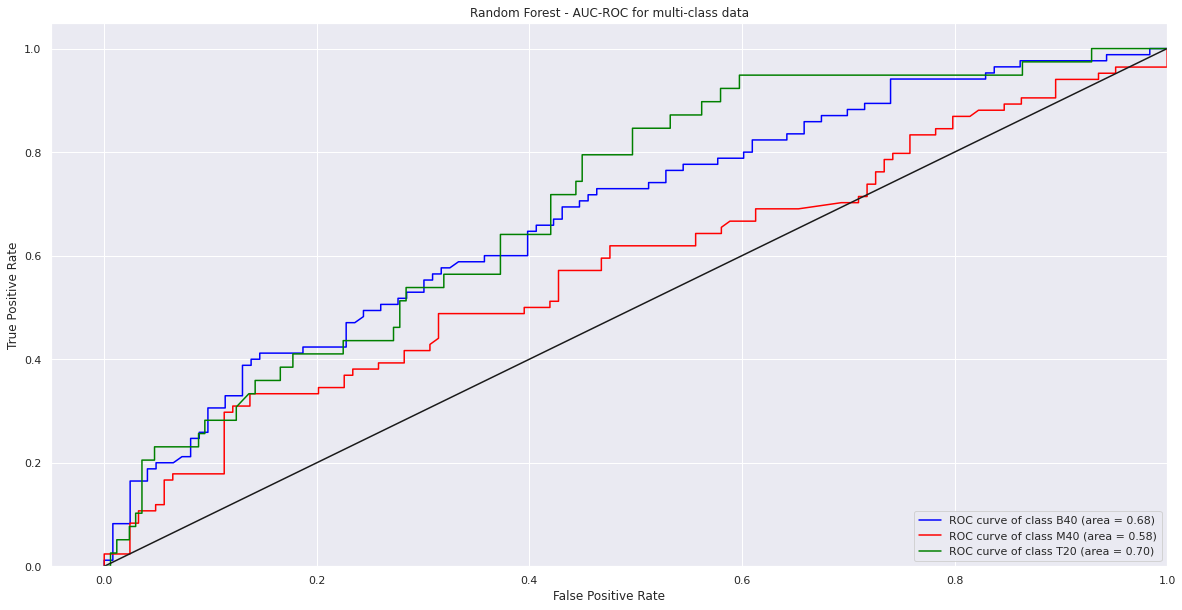

Multilayer Percepteron Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.49      0.92      0.64        53
         M40       0.59      0.26      0.36        50
         T20       0.50      0.09      0.15        22

    accuracy                           0.51       125
   macro avg       0.53      0.43      0.39       125
weighted avg       0.53      0.51      0.44       125



Multilayer Percepteron Classifier (Train/Test Split) - Confusion Matrix:
 [[49  4  0]
 [35 13  2]
 [15  5  2]]


Multilayer Percepteron Classifier (Train/Test Split) - Mean FPR:
 0.2779539733908666


Multilayer Percepteron Classifier (Train/Test Split) - Accuracy:
 0.512


Multilayer Percepteron Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.60 accuracy with a Standard Deviation of 0.10
[0.8398852223816355, 0.6894201228878648, 0.7795478683052647]
Multilayer Percepteron Classifier - Mean AUC-ROC Score

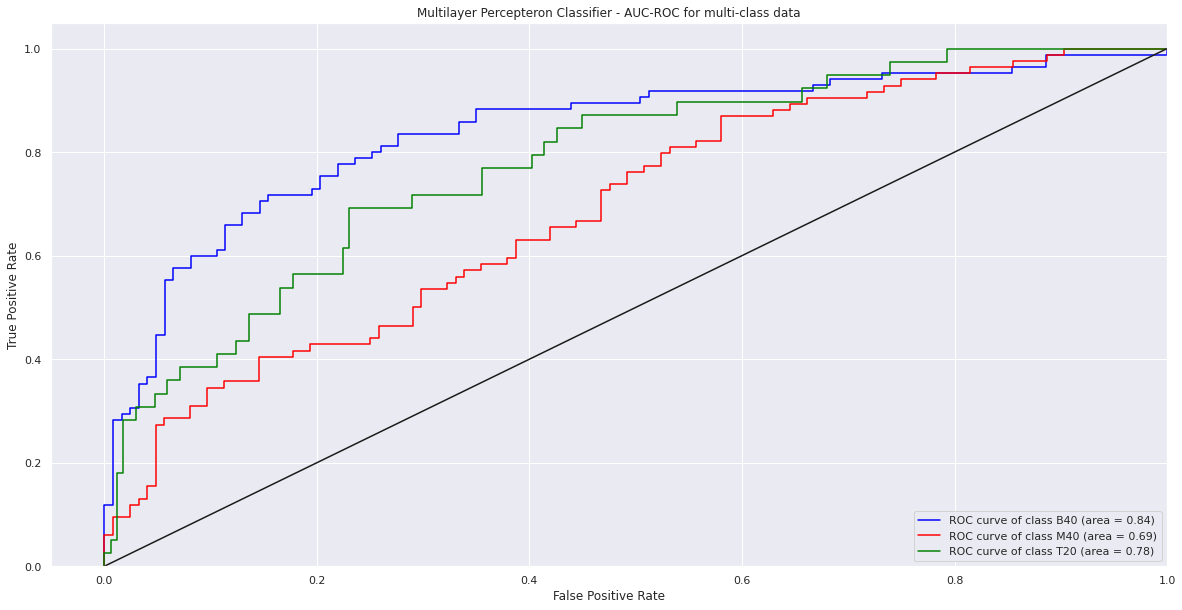

Classifier Persistence Completed!
K-nearest Neighbors Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.64      0.55      0.59        53
         M40       0.47      0.70      0.56        50
         T20       0.50      0.14      0.21        22

    accuracy                           0.54       125
   macro avg       0.54      0.46      0.46       125
weighted avg       0.55      0.54      0.51       125



K-nearest Neighbors Classifier (Train/Test Split) - Confusion Matrix:
 [[29 23  1]
 [13 35  2]
 [ 3 16  3]]


K-nearest Neighbors Classifier (Train/Test Split) - Mean FPR:
 0.2571161452714851


K-nearest Neighbors Classifier (Train/Test Split) - Accuracy:
 0.536


K-nearest Neighbors Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.56 accuracy with a Standard Deviation of 0.07
[0.7774270683883309, 0.6013344854070661, 0.6684873312092247]
K-nearest Neighbors Classifier - Me

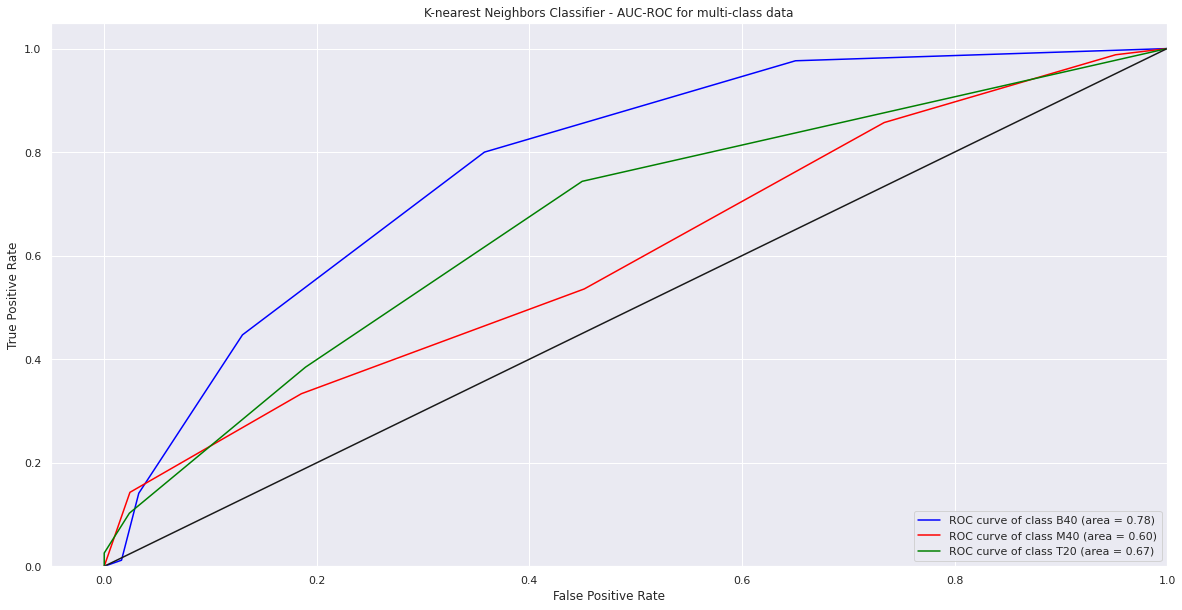

In [32]:
data_with_stopwords = vectorize_words(all_desc)

# print(all_desc)
# print(data_with_stopwords.size)

mnb_model(data_with_stopwords, target)
svm_model(data_with_stopwords, target)
rf_model(data_with_stopwords, target)
mlp_model(data_with_stopwords, target)
knn_model(data_with_stopwords, target)

### Without Stopwords

In [33]:
# Removing stopwords
def remove_stopwords(s):
    big_regex = re.compile(r'\b%s\b' % r'\b|\b'.join(map(re.escape, stop_words)))
    return big_regex.sub('',s)

all_desc_wo_sw = [remove_stopwords(s) for s in all_desc]

Multinomial Naive Bayes (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.76      0.66      0.71        53
         M40       0.54      0.70      0.61        50
         T20       0.43      0.27      0.33        22

    accuracy                           0.61       125
   macro avg       0.58      0.54      0.55       125
weighted avg       0.61      0.61      0.60       125



Multinomial Naive Bayes (Train/Test Split) - Confusion Matrix:
 [[35 15  3]
 [10 35  5]
 [ 1 15  6]]


Multinomial Naive Bayes (Train/Test Split) - Mean FPR:
 0.2101492268967997


Multinomial Naive Bayes (Train/Test Split) - Accuracy:
 0.608


Multinomial Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.62 accuracy with a Standard Deviation of 0.13
[0.8248206599713056, 0.7228302611367127, 0.8293885601577909]
Multinomial Naive Bayes - Mean AUC-ROC Score:

 0.7923464937552698


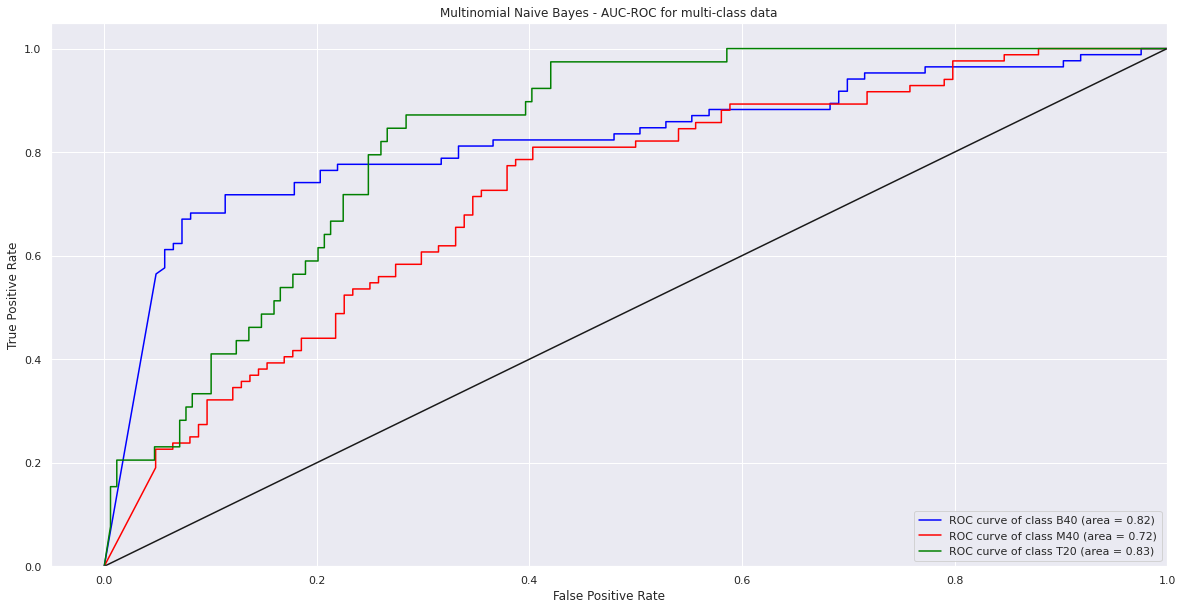

Support Vector Machine (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.74      0.64      0.69        53
         M40       0.51      0.80      0.62        50
         T20       0.00      0.00      0.00        22

    accuracy                           0.59       125
   macro avg       0.42      0.48      0.44       125
weighted avg       0.52      0.59      0.54       125



Support Vector Machine (Train/Test Split) - Confusion Matrix:
 [[34 19  0]
 [10 40  0]
 [ 2 20  0]]


Support Vector Machine (Train/Test Split) - Mean FPR:
 0.2288888888888889


Support Vector Machine (Train/Test Split) - Accuracy:
 0.592


Support Vector Machine (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.60 accuracy with a Standard Deviation of 0.10
[0.8526542324246772, 0.6991167434715821, 0.7199211045364892]
Support Vector Machine - Mean AUC-ROC Score:

 0.7572306934775828


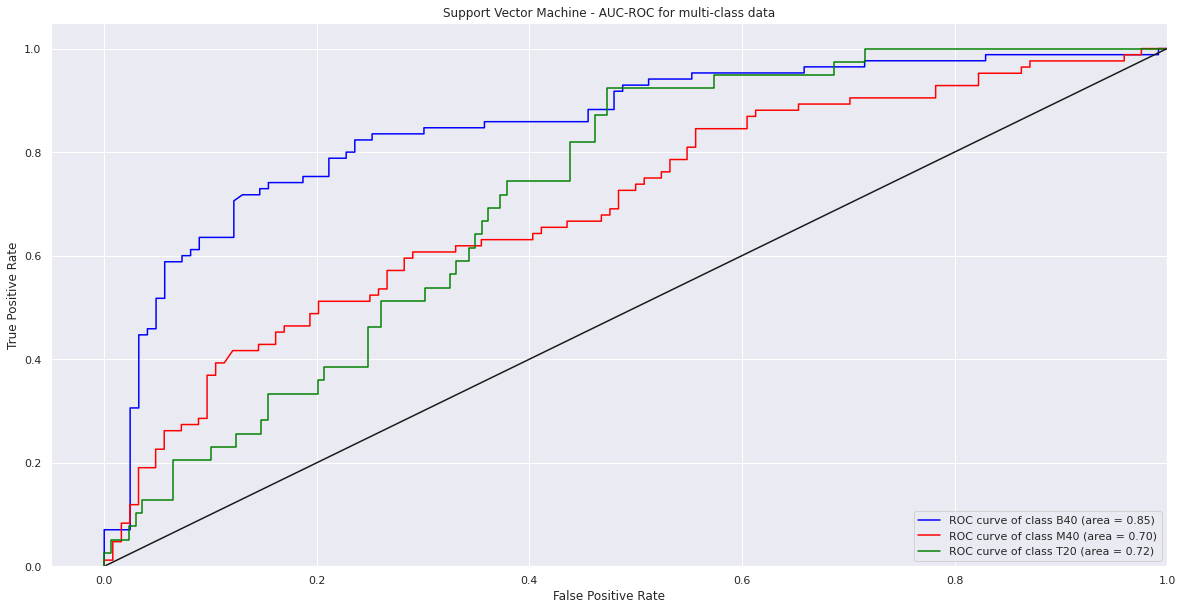

Random Forest (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.00      0.00      0.00        85
         M40       0.39      1.00      0.57        82
         T20       0.00      0.00      0.00        41

    accuracy                           0.39       208
   macro avg       0.13      0.33      0.19       208
weighted avg       0.16      0.39      0.22       208



Random Forest (Train/Test Split) - Confusion Matrix:
 [[ 0 85  0]
 [ 0 82  0]
 [ 0 41  0]]


Random Forest (Train/Test Split) - Mean FPR:
 0.3333333333333333


Random Forest (Train/Test Split) - Accuracy:
 0.3942307692307692


Random Forest (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.42 accuracy with a Standard Deviation of 0.08
[0.706647537063606, 0.6597062211981567, 0.5075102412380519]
Random Forest - Mean AUC-ROC Score:

 0.6246213331666048


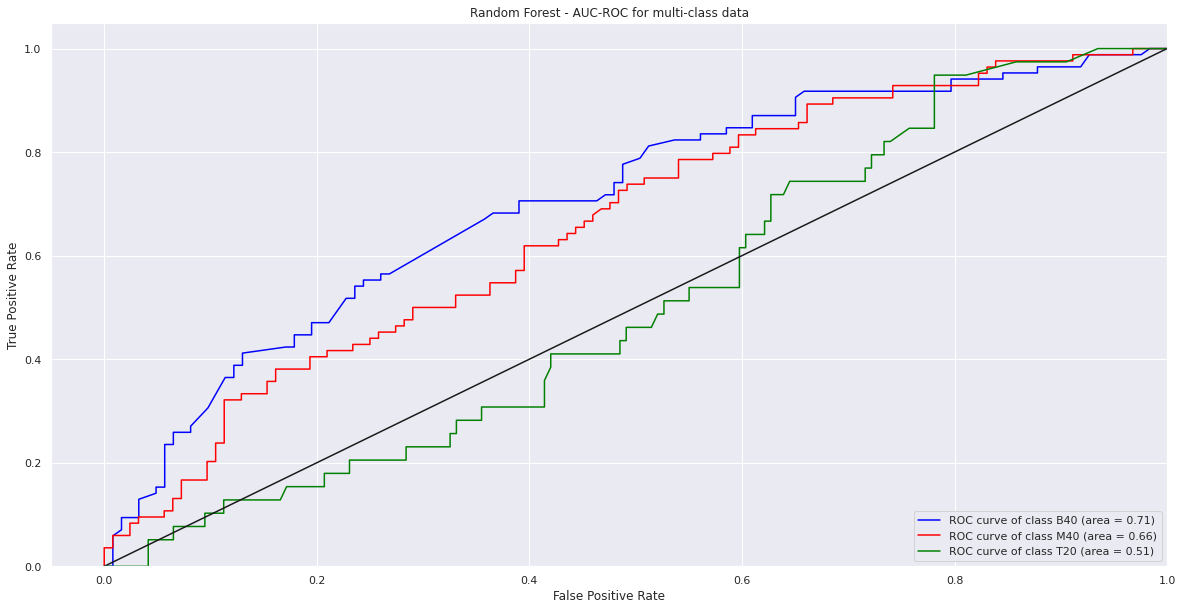

Multilayer Percepteron Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.55      0.77      0.64        53
         M40       0.50      0.42      0.46        50
         T20       0.50      0.18      0.27        22

    accuracy                           0.53       125
   macro avg       0.52      0.46      0.45       125
weighted avg       0.52      0.53      0.50       125



Multilayer Percepteron Classifier (Train/Test Split) - Confusion Matrix:
 [[41 12  0]
 [25 21  4]
 [ 9  9  4]]


Multilayer Percepteron Classifier (Train/Test Split) - Mean FPR:
 0.26368572455951095


Multilayer Percepteron Classifier (Train/Test Split) - Accuracy:
 0.528


Multilayer Percepteron Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.60 accuracy with a Standard Deviation of 0.12
[0.8273553323768531, 0.7147657450076805, 0.8194507661963283]
Multilayer Percepteron Classifier - Mean AUC-ROC Scor

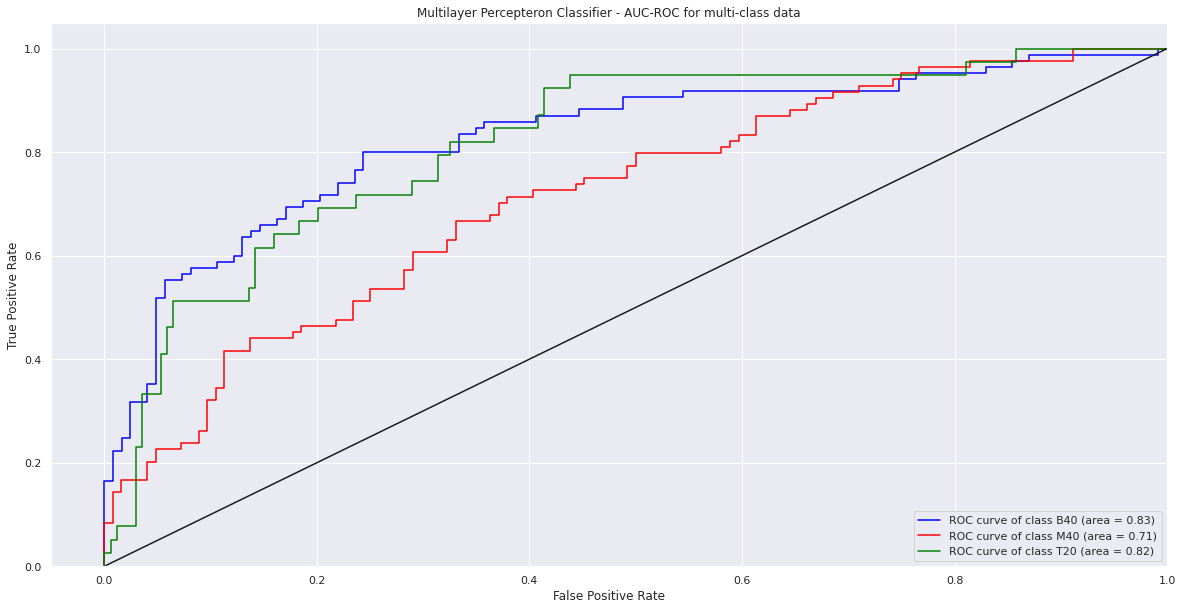

Classifier Persistence Completed!
K-nearest Neighbors Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.66      0.70      0.68        53
         M40       0.52      0.66      0.58        50
         T20       0.20      0.05      0.07        22

    accuracy                           0.57       125
   macro avg       0.46      0.47      0.44       125
weighted avg       0.52      0.57      0.53       125



K-nearest Neighbors Classifier (Train/Test Split) - Confusion Matrix:
 [[37 15  1]
 [14 33  3]
 [ 5 16  1]]


K-nearest Neighbors Classifier (Train/Test Split) - Mean FPR:
 0.23868572455951095


K-nearest Neighbors Classifier (Train/Test Split) - Accuracy:
 0.568


K-nearest Neighbors Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.57 accuracy with a Standard Deviation of 0.11
[0.7706838833094214, 0.6453533026113671, 0.5916401153087544]
K-nearest Neighbors Classifier - M

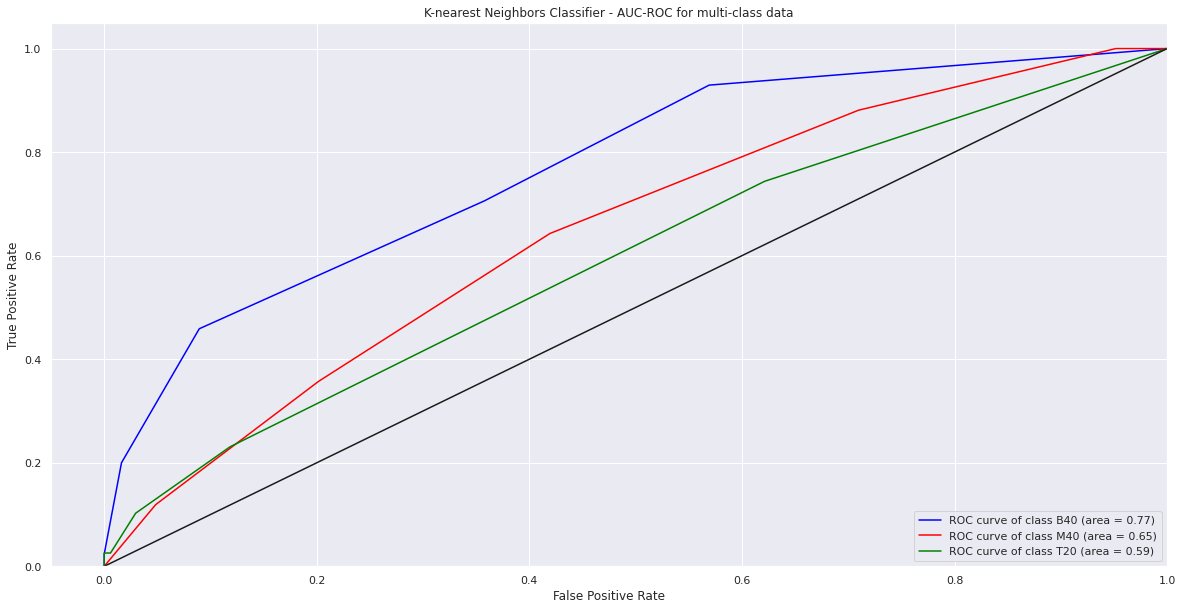

In [34]:
data_without_stopwords = vectorize_words(all_desc_wo_sw)

mnb_model(data_without_stopwords, target)
svm_model(data_without_stopwords, target)
rf_model(data_without_stopwords, target)
mlp_model(data_without_stopwords, target)
knn_model(data_without_stopwords, target)

### With Lemmatization

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None 

# Lemmatizing the data
all_desc_lemm = []
for i in range(0,len(all_desc_wo_sw)):
    desc = all_desc_wo_sw[i]
    desc2 = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',desc)
    for p in punctuation:
        desc2 = desc2.replace(p,'')
    tagged = nltk.pos_tag(word_tokenize(desc2))
    list_lemmatized = []
    for word, tag in tagged:
        wntag = get_wordnet_pos(tag)
        if wntag is None:# not supply tag in case of None
            list_lemmatized.append(lemmatizer.lemmatize(word)) 
        else:
            list_lemmatized.append(lemmatizer.lemmatize(word, pos=wntag))
    k = ' '.join(list_lemmatized)   
    all_desc_lemm.append(k)


Gaussian Naive Bayes (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.78      0.55      0.64        53
         M40       0.54      0.76      0.63        50
         T20       0.41      0.32      0.36        22

    accuracy                           0.59       125
   macro avg       0.58      0.54      0.54       125
weighted avg       0.62      0.59      0.59       125



Gaussian Naive Bayes (Train/Test Split) - Confusion Matrix:
 [[29 20  4]
 [ 6 38  6]
 [ 2 13  7]]


Gaussian Naive Bayes (Train/Test Split) - Mean FPR:
 0.21606616325062925


Gaussian Naive Bayes (Train/Test Split) - Accuracy:
 0.592


Gaussian Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.58 accuracy with a Standard Deviation of 0.10
[0.6802008608321378, 0.6096390168970813, 0.5848126232741617]
Gaussian Naive Bayes - Mean AUC-ROC Score:

 0.624884167001127


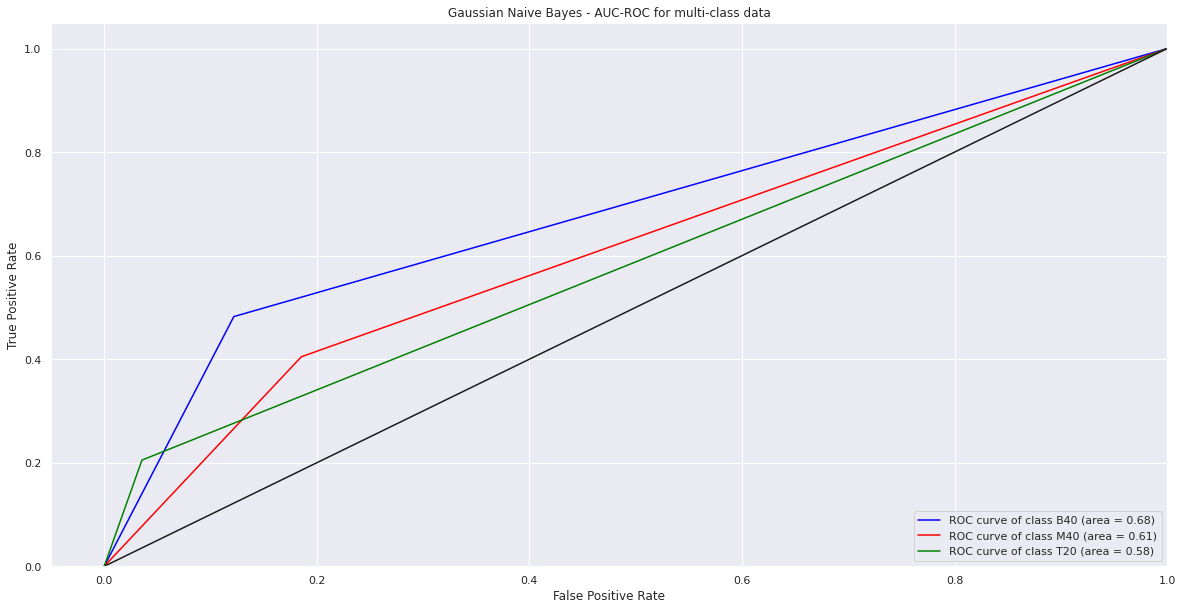

Support Vector Machine (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.76      0.66      0.71        53
         M40       0.51      0.80      0.62        50
         T20       0.00      0.00      0.00        22

    accuracy                           0.60       125
   macro avg       0.42      0.49      0.44       125
weighted avg       0.53      0.60      0.55       125



Support Vector Machine (Train/Test Split) - Confusion Matrix:
 [[35 18  0]
 [10 40  0]
 [ 1 21  0]]


Support Vector Machine (Train/Test Split) - Mean FPR:
 0.22425925925925927


Support Vector Machine (Train/Test Split) - Accuracy:
 0.6


Support Vector Machine (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.60 accuracy with a Standard Deviation of 0.09
[0.8539454806312768, 0.7053571428571429, 0.7058109543316644]
Support Vector Machine - Mean AUC-ROC Score:

 0.7550378592733614


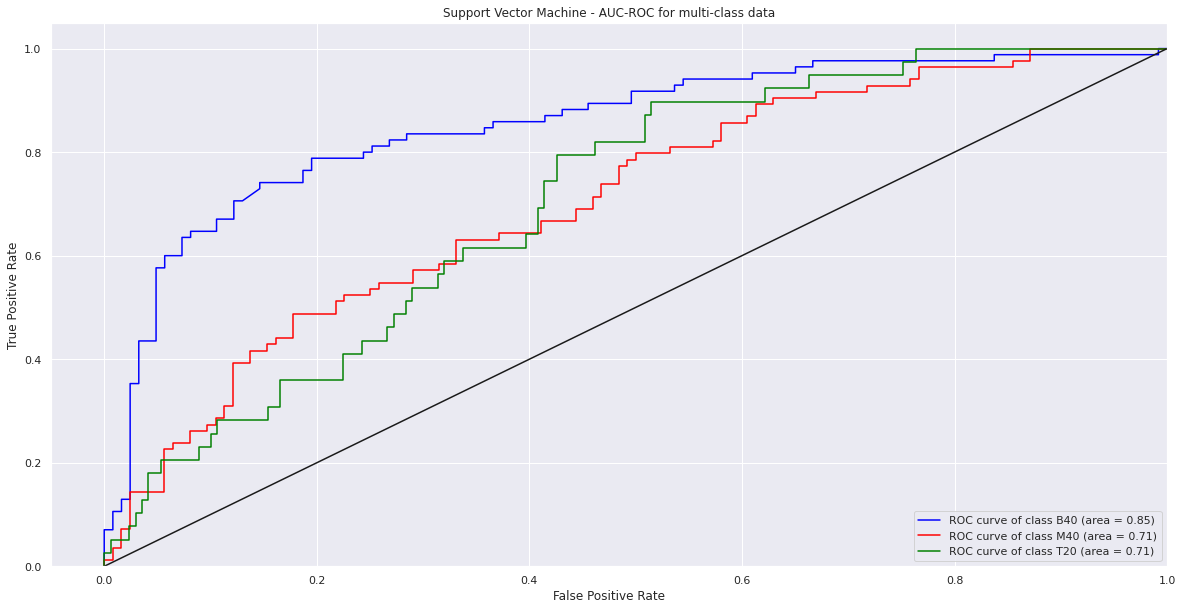

Random Forest (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.00      0.00      0.00        85
         M40       0.39      1.00      0.57        82
         T20       0.00      0.00      0.00        41

    accuracy                           0.39       208
   macro avg       0.13      0.33      0.19       208
weighted avg       0.16      0.39      0.22       208



Random Forest (Train/Test Split) - Confusion Matrix:
 [[ 0 85  0]
 [ 0 82  0]
 [ 0 41  0]]


Random Forest (Train/Test Split) - Mean FPR:
 0.3333333333333333


Random Forest (Train/Test Split) - Accuracy:
 0.3942307692307692


Random Forest (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.45 accuracy with a Standard Deviation of 0.09
[0.609947393591583, 0.5645161290322581, 0.5581854043392505]
Random Forest - Mean AUC-ROC Score:

 0.5775496423210306


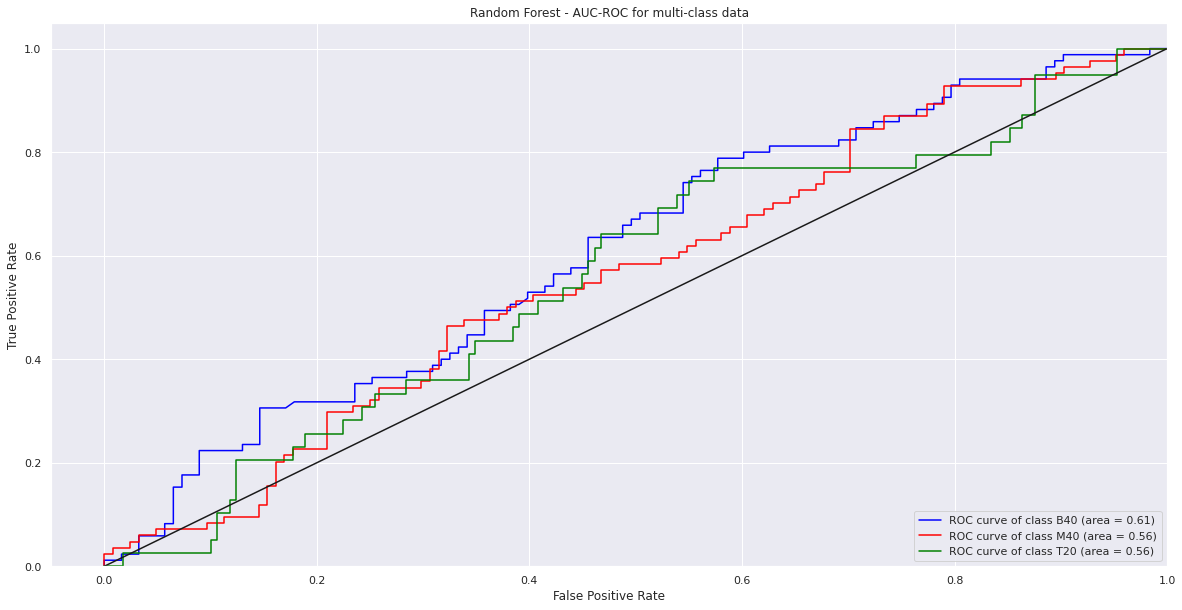

Multilayer Percepteron Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.79      0.57      0.66        53
         M40       0.51      0.80      0.62        50
         T20       0.44      0.18      0.26        22

    accuracy                           0.59       125
   macro avg       0.58      0.52      0.51       125
weighted avg       0.62      0.59      0.57       125



Multilayer Percepteron Classifier (Train/Test Split) - Confusion Matrix:
 [[30 23  0]
 [ 5 40  5]
 [ 3 15  4]]


Multilayer Percepteron Classifier (Train/Test Split) - Mean FPR:
 0.2221071556993887


Multilayer Percepteron Classifier (Train/Test Split) - Accuracy:
 0.592


Multilayer Percepteron Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.60 accuracy with a Standard Deviation of 0.10
[0.8195121951219513, 0.7068932411674347, 0.7965407373691398]
Multilayer Percepteron Classifier - Mean AUC-ROC Score

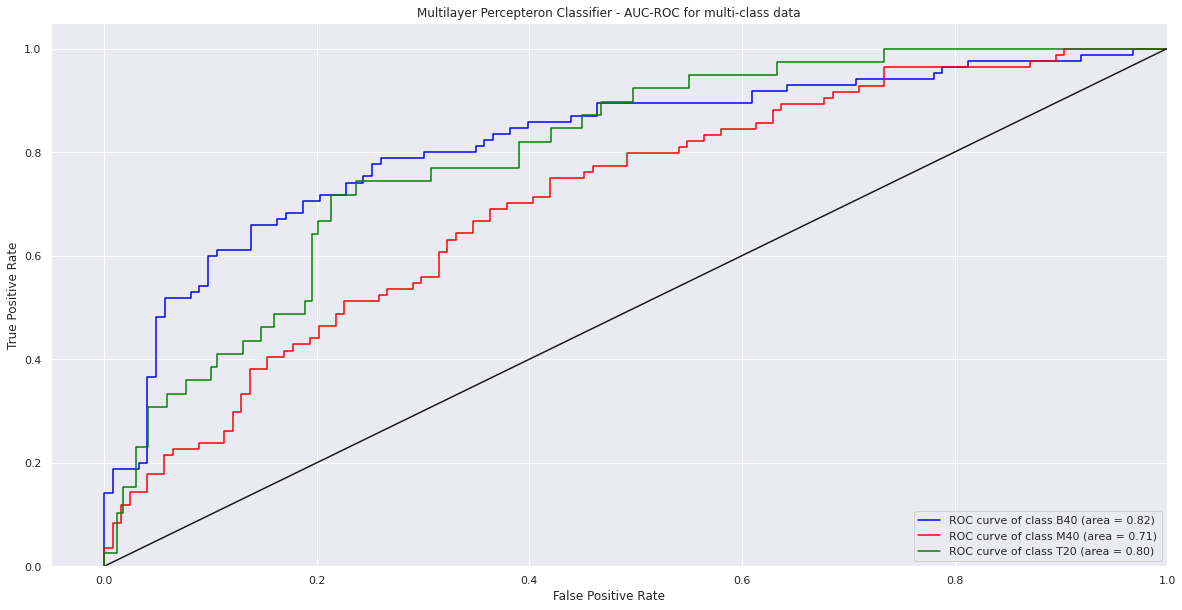

Classifier Persistence Completed!
K-nearest Neighbors Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.67      0.62      0.65        53
         M40       0.48      0.68      0.56        50
         T20       0.20      0.05      0.07        22

    accuracy                           0.54       125
   macro avg       0.45      0.45      0.43       125
weighted avg       0.51      0.54      0.51       125



K-nearest Neighbors Classifier (Train/Test Split) - Confusion Matrix:
 [[33 20  0]
 [12 34  4]
 [ 4 17  1]]


K-nearest Neighbors Classifier (Train/Test Split) - Mean FPR:
 0.2514635023372887


K-nearest Neighbors Classifier (Train/Test Split) - Accuracy:
 0.544


K-nearest Neighbors Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.54 accuracy with a Standard Deviation of 0.08
[0.7936394069823052, 0.6685867895545314, 0.6319223183128508]
K-nearest Neighbors Classifier - Me

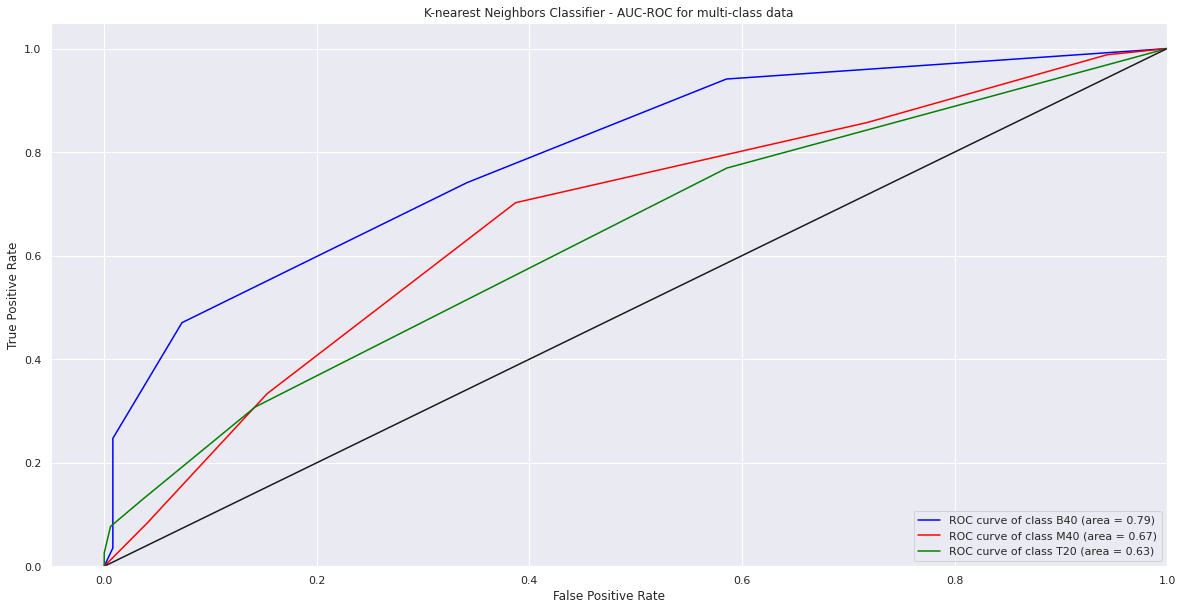

In [36]:
data_with_lemmatization = vectorize_words(all_desc_lemm)

gnb_model(data_with_lemmatization, target)
svm_model(data_with_lemmatization, target)
rf_model(data_with_lemmatization, target)
mlp_model(data_with_lemmatization, target)
knn_model(data_with_lemmatization, target)

# Data Augmentation (Count Vectorizer)


4116800
4067000
3446990
Gaussian Naive Bayes (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.72      0.91      0.80        53
         M40       0.64      0.60      0.62        50
         T20       0.82      0.41      0.55        22

    accuracy                           0.70       125
   macro avg       0.72      0.64      0.65       125
weighted avg       0.70      0.70      0.68       125



Gaussian Naive Bayes (Train/Test Split) - Confusion Matrix:
 [[48  4  1]
 [19 30  1]
 [ 0 13  9]]


Gaussian Naive Bayes (Train/Test Split) - Mean FPR:
 0.16999101042790363


Gaussian Naive Bayes (Train/Test Split) - Accuracy:
 0.696


Gaussian Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.69 accuracy with a Standard Deviation of 0.11
[0.9199426111908178, 0.8705837173579108, 0.8255196480048551]
Gaussian Naive Bayes - Mean AUC-ROC Score:

 0.8720153255178612


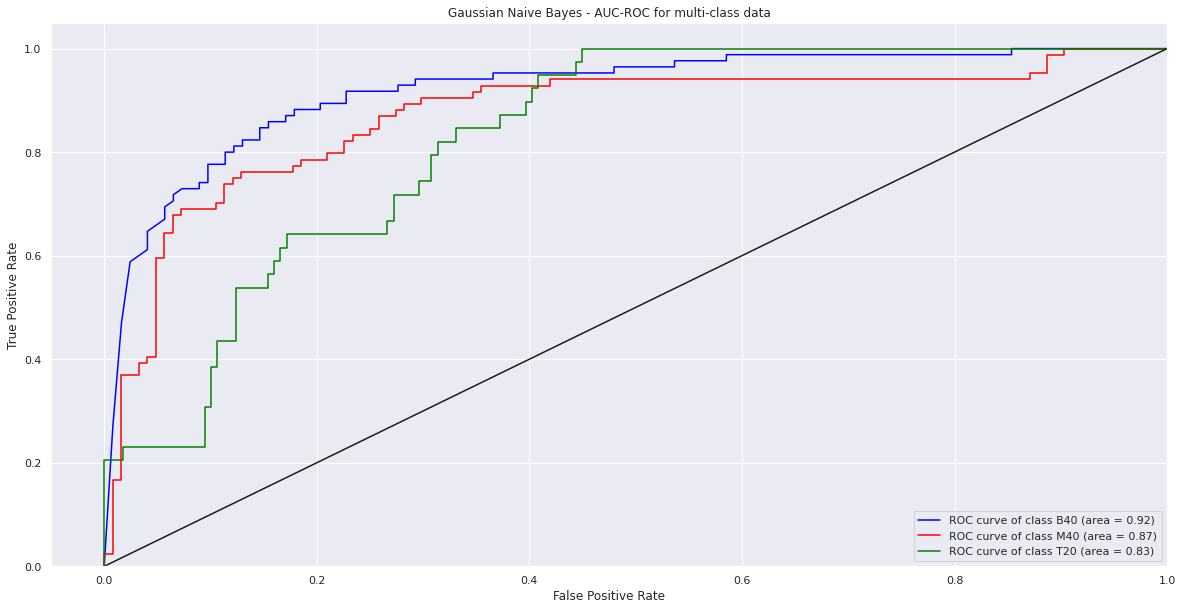

Support Vector Machine (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.96      0.94      0.95        53
         M40       0.80      0.96      0.87        50
         T20       0.92      0.55      0.69        22

    accuracy                           0.88       125
   macro avg       0.89      0.82      0.84       125
weighted avg       0.89      0.88      0.87       125



Support Vector Machine (Train/Test Split) - Confusion Matrix:
 [[50  2  1]
 [ 2 48  0]
 [ 0 10 12]]


Support Vector Machine (Train/Test Split) - Mean FPR:
 0.06582883854728515


Support Vector Machine (Train/Test Split) - Accuracy:
 0.88


Support Vector Machine (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.85 accuracy with a Standard Deviation of 0.09
[0.9933046389287422, 0.7442396313364055, 0.9912001213776362]
Support Vector Machine - Mean AUC-ROC Score:

 0.909581463880928


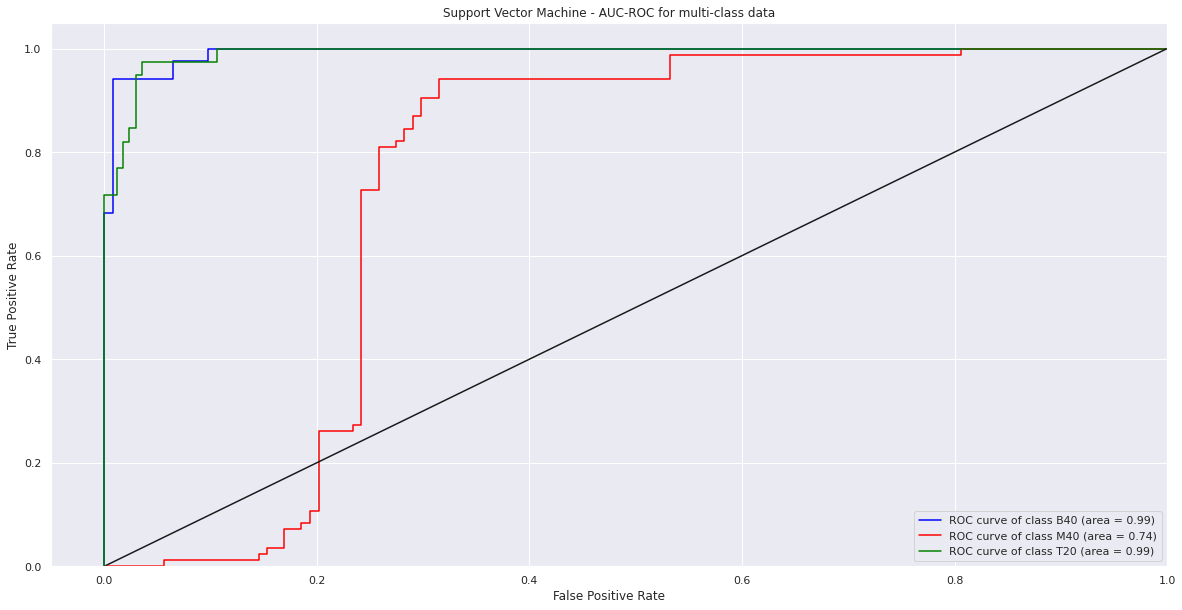

Random Forest (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.00      0.00      0.00        85
         M40       0.39      1.00      0.57        82
         T20       0.00      0.00      0.00        41

    accuracy                           0.39       208
   macro avg       0.13      0.33      0.19       208
weighted avg       0.16      0.39      0.22       208



Random Forest (Train/Test Split) - Confusion Matrix:
 [[ 0 85  0]
 [ 0 82  0]
 [ 0 41  0]]


Random Forest (Train/Test Split) - Mean FPR:
 0.3333333333333333


Random Forest (Train/Test Split) - Accuracy:
 0.3942307692307692


Random Forest (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.52 accuracy with a Standard Deviation of 0.10
[0.721090387374462, 0.8072196620583717, 0.5813988772568653]
Random Forest - Mean AUC-ROC Score:

 0.7032363088965664


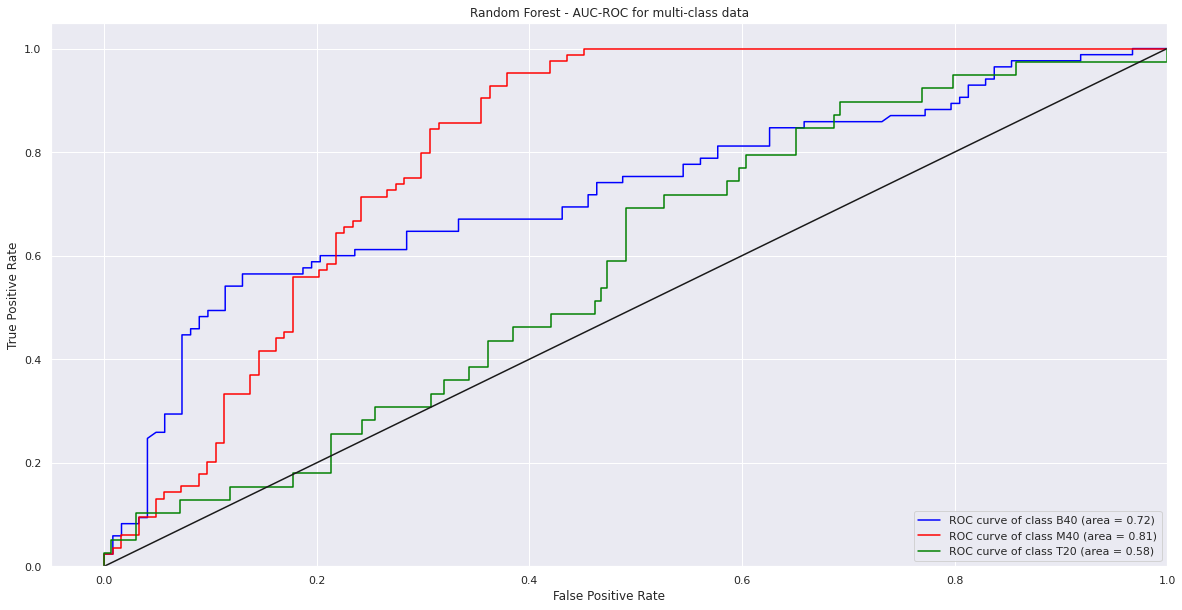

Multilayer Percepteron Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       0.87      0.49      0.63        53
         M40       0.51      0.84      0.64        50
         T20       0.54      0.32      0.40        22

    accuracy                           0.60       125
   macro avg       0.64      0.55      0.55       125
weighted avg       0.67      0.60      0.59       125



Multilayer Percepteron Classifier (Train/Test Split) - Confusion Matrix:
 [[26 26  1]
 [ 3 42  5]
 [ 1 14  7]]


Multilayer Percepteron Classifier (Train/Test Split) - Mean FPR:
 0.21571377202445163


Multilayer Percepteron Classifier (Train/Test Split) - Accuracy:
 0.6


Multilayer Percepteron Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.55 accuracy with a Standard Deviation of 0.19
[0.9893830703012912, 0.4877112135176651, 0.9230769230769231]
Multilayer Percepteron Classifier - Mean AUC-ROC Score:

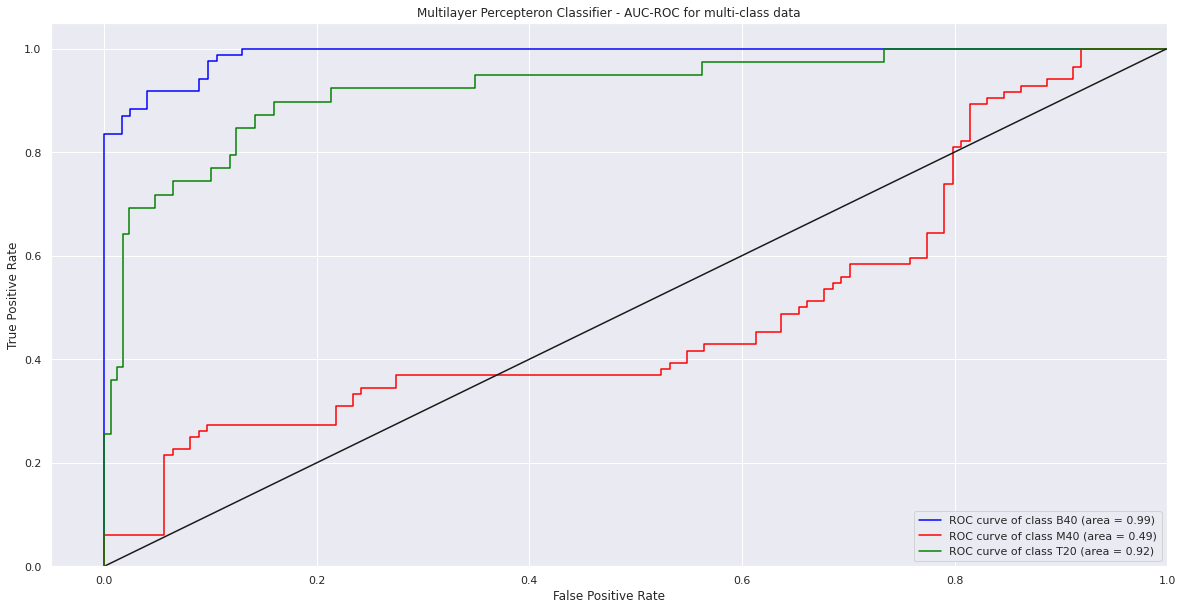

Classifier Persistence Completed!
K-nearest Neighbors Classifier (Train/Test Split) - Classification Report:

               precision    recall  f1-score   support

         B40       1.00      1.00      1.00        53
         M40       0.98      1.00      0.99        50
         T20       1.00      0.95      0.98        22

    accuracy                           0.99       125
   macro avg       0.99      0.98      0.99       125
weighted avg       0.99      0.99      0.99       125



K-nearest Neighbors Classifier (Train/Test Split) - Confusion Matrix:
 [[53  0  0]
 [ 0 50  0]
 [ 0  1 21]]


K-nearest Neighbors Classifier (Train/Test Split) - Mean FPR:
 0.0044444444444444444


K-nearest Neighbors Classifier (Train/Test Split) - Accuracy:
 0.992


K-nearest Neighbors Classifier (10-Fold Stratified Cross Validation) - Cross Validation Score:

 0.96 accuracy with a Standard Deviation of 0.03
[0.9912003825920612, 0.9780145929339477, 0.9971172811409498]
K-nearest Neighbors Classifier -

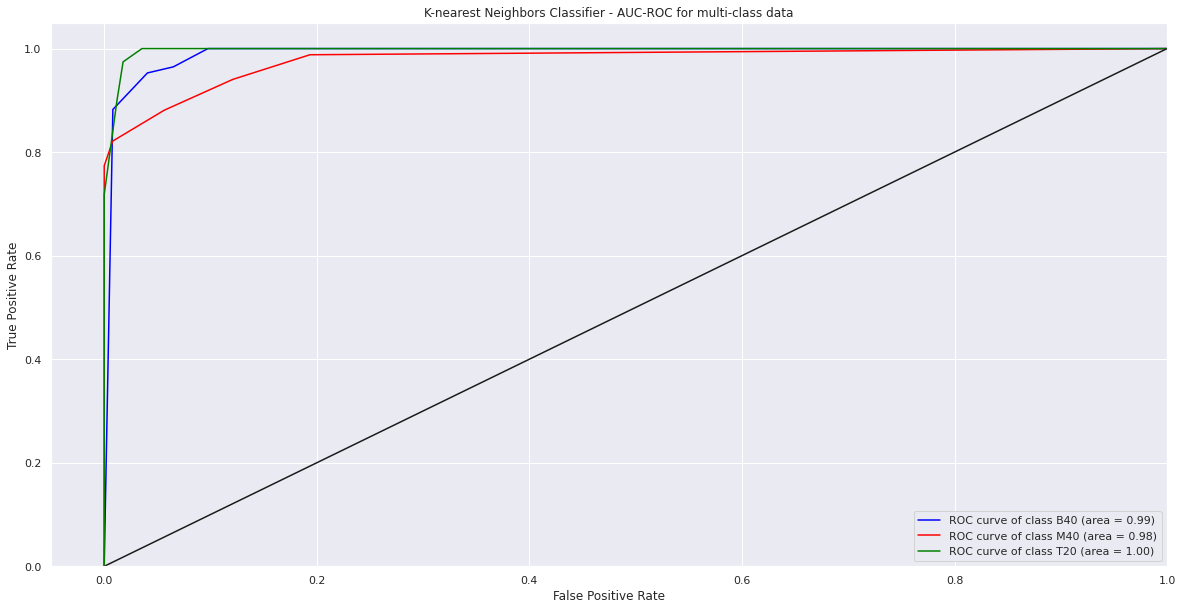

In [67]:
print(data_with_stopwords.size)
print(data_without_stopwords.size)
print(data_with_lemmatization.size)

# type(np.array(data_with_lemmatization.flatten()))
# type(train_x1)

print(train_x1[0])
# data_with_lemmatization

# train_x1['description'] = np.array(data_with_lemmatization.flatten())

# next_df = train_x1.drop(['description'], axis=1)
combined_data = pd.concat([train_x1, pd.DataFrame(data_with_lemmatization)], axis=1)
combined_data
# combined_data = data_with_lemmatization

gnb_model(combined_data, target)
svm_model(combined_data, target)
rf_model(combined_data, target)
mlp_model(combined_data, target)
knn_model(combined_data, target)

## Doc2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(all_desc_lemm)]
#display the tagged docs
print(card_docs)

#instantiate model
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            , epochs=model.epochs)

# train_df_d2v = pd.get_dummies(train_x, drop_first = True)
# data = np.array(train_x1)

card2vec = [model.infer_vector((all_desc_lemm[i].split(' '))) 
            for i in range(0,len(all_desc_lemm))]

# mnb_model(card2vec, target)
# svm_model(card2vec, target)
# rf_model(card2vec, target)
# mlp_model(card2vec, target)
# knn_model(card2vec, target)



# Tensorflow (USE)

In [ ]:
import tensorflow_hub as hub
#download the model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

embeddings = embed(all_desc)

mnb_model(embeddings, target)
svm_model(embeddings, target)
rf_model(embeddings, target)
mlp_model(embeddings, target)
knn_model(embeddings, target)

# DEPRECATED ~~~~~~~

In [ ]:
def models(l):
    from itertools import cycle

    from sklearn.preprocessing import label_binarize
    from sklearn.multiclass import OneVsRestClassifier

    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

    # Counting the occurence of each word in the corpus
    from sklearn.feature_extraction.text import CountVectorizer
    count_vect = CountVectorizer()
    x_train_counts = count_vect.fit_transform(l)
    count_vect.get_feature_names()
    
    data_matrix = x_train_counts.todense()

    # Creating the train and test split
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, target, test_size=0.3, random_state=1)

    # Multinomial Naive Bayes
    from sklearn.naive_bayes import MultinomialNB

    clf = MultinomialNB().fit(x_train, y_train)
    y_prediction = clf.predict(x_test)

    # Confusion Matrix
    classifier_confusion_matrix = confusion_matrix(y_test, y_prediction)
    FP = classifier_confusion_matrix.sum(axis=0) - np.diag(classifier_confusion_matrix)
    FN = classifier_confusion_matrix.sum(axis=1) - np.diag(classifier_confusion_matrix)
    TP = np.diag(classifier_confusion_matrix)
    TN = classifier_confusion_matrix.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy for each class
    ACC = (TP+TN)/(TP+FP+FN+TN)

    # Using 10-fold cross-validation
    cv = KFold(n_splits = 10, random_state = 42)
    cv = StratifiedKFold(n_splits = 10, random_state = 42)

    classifier_cross_validation_score = cross_val_score(clf, data_matrix, target, cv = cv, scoring = 'accuracy', n_jobs = -1)
    cross_validation_score = "%0.2f accuracy with a Standard Deviation of %0.2f" %(mean(classifier_cross_validation_score), std(classifier_cross_validation_score))

    # Print Results
    print('Multinomial Naive Bayes (Train/Test Split) - Classification Report:\n\n', classification_report(y_test, y_prediction))
    print('\n')
    print('Multinomial Naive Bayes (Train/Test Split) - Confusion Matrix:\n', classifier_confusion_matrix)
    print('\n')
    print('Multinomial Naive Bayes (Train/Test Split) - Mean FPR:\n', mean(FPR))
    print('\n')
    print('Multinomial Naive Bayes (Train/Test Split) - Accuracy:\n', accuracy_score(y_test, y_prediction))
    print('\n')
    print('Multinomial Naive Bayes (10-Fold Stratified Cross Validation) - Cross Validation Score:\n\n', cross_validation_score)

    y_bin = label_binarize(target, classes = class_names)
    n_classes = y_bin.shape[1]
    x_train, x_test, y_train, y_test = train_test_split(data_matrix, y_bin, test_size = 0.5, random_state = 0)

    rest_classifier = OneVsRestClassifier(MultinomialNB())
    y_score = rest_classifier.fit(x_train, y_train).predict_proba(x_test)

    # Plotting and estimation of FPR, TPR

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    roc_auc_scores = list(roc_auc.values())

    print(roc_auc_scores)

    colors = cycle(['blue', 'red', 'green'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

    print('Multinomial Naive Bayes - Mean AUC-ROC Score:\n\n', mean(roc_auc_scores))

    plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multinomial Naive Bayes - AUC-ORC for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
models(raw_description)

# With Stopwords

## With lemmatization

In [ ]:
print(len(all_desc))
models(all_desc)

# Without stopwords

In [ ]:

models(all_desc_lemm)

# Combined Classifier

In [ ]:
def combined_models(l):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score

    # Counting the occurence of each word in the corpus
    from sklearn.feature_extraction.text import CountVectorizer
    count_vect = CountVectorizer()
    x_train_counts = count_vect.fit_transform(l)
    count_vect.get_feature_names()
    x_matrix = x_train_counts.todense()

    #print(x_train_counts)

    y = np.array(train_df['target'])

    # Linear Regression (LR)

    # Creating the train and test split
    lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(x_train_counts, y, test_size=0.3, random_state=1)

    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression().fit(lr_x_train, lr_y_train)
    lr_labels = clf.predict(lr_x_test)
    lr_cf = confusion_matrix(lr_y_test, lr_labels)

    # calculate prediction probability
    lr_prediction_probability = clf.predict_proba(lr_x_test)
    lr_positive_predictions = lr_prediction_probability[:,1]

    # calculate scores
    lr_auc = roc_auc_score(lr_y_test, lr_positive_predictions)
    lr_fpr, lr_tpr, _ = roc_curve(lr_y_test, lr_positive_predictions)

    # Multinomial
    # Creating the train and test split
    x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_train_counts, y, test_size=0.3, random_state=1)

    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB().fit(x_train_m, y_train_m)
    labels_m = clf.predict(x_test_m)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    mat_m = confusion_matrix(y_test_m, labels_m)

    # calculate prediction probability
    m_prediction_probability = clf.predict_proba(x_test_m)
    m_positive_predictions = m_prediction_probability[:,1]

    # calculate scores
    m_auc = roc_auc_score(y_test_m, m_positive_predictions)
    m_fpr, m_tpr, _ = roc_curve(y_test_m, m_positive_predictions)

    # Bernoulli

    # Changing the data to binary to input BernoulliNB
    x_train_b1 = x_train_counts.todense()
    x_train_counts_ber = np.where(x_train_b1 >=1 ,1,0)

    # Creating the train and test split for bernoulli
    from sklearn.model_selection import train_test_split
    x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_train_counts_ber, y, test_size=0.3, random_state=1)

    from sklearn.naive_bayes import BernoulliNB
    clf = BernoulliNB().fit(x_train_b, y_train_b)
    labels_b = clf.predict(x_test_b)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    mat_b = confusion_matrix(y_test_b, labels_b)

    # calculate prediction probability
    b_prediction_probability = clf.predict_proba(x_test_b)
    b_positive_predictions = b_prediction_probability[:,1]

    # calculate scores
    b_auc = roc_auc_score(y_test_b, b_positive_predictions)
    b_fpr, b_tpr, _ = roc_curve(y_test_b, b_positive_predictions)

    # SVM

    # Creating the train and test split for SVM
    x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_train_counts, y, test_size=0.3, random_state=1)

    from sklearn import svm
    clf = svm.SVC(probability = True)
    clf.fit(x_train_s, y_train_s)
    labels_s = clf.predict(x_test_s)
    mat_s = confusion_matrix(y_test_m, labels_m)

    # calculate prediction probability
    s_prediction_probability = clf.predict_proba(x_test_s)
    s_positive_predictions = s_prediction_probability[:,1]

    # calculate scores
    s_auc = roc_auc_score(y_test_s, s_positive_predictions)
    s_fpr, s_tpr, _ = roc_curve(y_test_s, s_positive_predictions)

    # RF

    # Creating the train and test split for RF
    rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(x_train_counts, y, test_size=0.3, random_state=1)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier()
    clf.fit(rf_x_train, rf_y_train)
    rf_labels = clf.predict(rf_x_test)
    rf_cm = confusion_matrix(rf_y_test, rf_labels)

    # calculate prediction probability
    rf_prediction_probability = clf.predict_proba(rf_x_test)
    rf_positive_predictions = rf_prediction_probability[:,1]

    # calculate scores
    rf_auc = roc_auc_score(rf_y_test, rf_positive_predictions)
    rf_fpr, rf_tpr, _ = roc_curve(rf_y_test, rf_positive_predictions)

    # NN MLP

    # Creating the train and test split for MLP
    mlp_x_train, mlp_x_test, mlp_y_train, mlp_y_test = train_test_split(x_train_counts, y, test_size = 0.20)
    
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler(with_mean=False)
    scaler.fit(mlp_x_train)

    mlp_x_train = scaler.transform(mlp_x_train)
    mlp_x_test = scaler.transform(mlp_x_test)

    from sklearn.neural_network import MLPClassifier

    clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
    clf.fit(mlp_x_train, mlp_y_train)
    mlp_labels = clf.predict(mlp_x_test)
    mlp_cm = confusion_matrix(mlp_y_test, mlp_labels)

    # calculate prediction probability
    mlp_prediction_probability = clf.predict_proba(mlp_x_test)
    mlp_positive_predictions = mlp_prediction_probability[:,1]

    # calculate scores
    mlp_auc = roc_auc_score(mlp_y_test, mlp_positive_predictions)
    mlp_fpr, mlp_tpr, _ = roc_curve(mlp_y_test, mlp_positive_predictions)

    # CONCLUSIONS

    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LR')
    pyplot.plot(b_fpr, b_tpr, marker='.', label='BernoulliNB')
    pyplot.plot(m_fpr, m_tpr, marker='.', label='MultinomialNB')
    pyplot.plot(s_fpr, s_tpr, marker='.', label='SVM')
    pyplot.plot(s_fpr, s_tpr, marker='.', label='RF')
    pyplot.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP')

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
  
    print ('Confusion matrix:', rf_cm)
    print ('Accuracy using LR:', accuracy_score(lr_y_test, lr_labels))
    print ('LR: ROC AUC=%.3f' % (lr_auc))

    print ('Confusion matrix:',mat_b)
    print ('Accuracy using BernoulliNB:', accuracy_score(y_test_b, labels_b))
    print ('BernoulliNB: ROC AUC=%.3f' % (b_auc))

    print ('Confusion matrix:',mat_m)
    print ('Accuracy using MultinomialNB:', accuracy_score(y_test_m, labels_m))
    print('MultinomialNB: ROC AUC=%.3f' % (m_auc))

    print ('Confusion matrix:',mat_s)
    print ('Accuracy using SVM:', accuracy_score(y_test_s, labels_s))
    print ('SVM: ROC AUC=%.3f' % (s_auc))

    print ('Confusion matrix:', rf_cm)
    print ('Accuracy using RF:', accuracy_score(rf_y_test, rf_labels))
    print ('RF: ROC AUC=%.3f' % (rf_auc))

    print ('Confusion matrix:', mlp_cm)
    print ('Accuracy using MLP:', accuracy_score(mlp_y_test, mlp_labels))
    print ('MLP: ROC AUC=%.3f' % (mlp_auc))

In [ ]:
combined_models(all_desc_lemm)